<a href="https://colab.research.google.com/github/MarekSroka/Bank_Deposits/blob/main/Bank_deposit_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Deposits

**TREŚĆ ZADANIA**

W pliku Bank Marketing data.csv znajdują się dane charakteryzujące klientów pewnego banku oraz kampanie marketingowe skierowane do tych klientów. Dołączone są ponadto wskaźniki społeczne i ekonomiczne. Na podstawie tych danych należy zbudować model prognozujący szansę, że klient w wyniku prowadzonej kampanii założy lokatę terminową. Szczegółowy opis danych znajduje się w pliku Description.txt (opis jest w języku angielskim). Proszę się z nim zapoznać, gdyż zawiera ważne z punktu widzenia modelowania informacje.
Proszę o przesłanie raportu w którym opisana zostanie budowa modelu. Proszę zawrzeć w raporcie opis poszczególnych kroków prowadzących do powstania modelu.
Format pliku: pdf, word
Język raportu: polski lub angielski (nie ma to znaczenia dla oceny)

Title: Bank Marketing data (with social/economic context)

3. Time range: from May 3008 to November 2010

3. Attribute information:

   Input variables:
## Bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   # Related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   # Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

   # Social and economic context attributes

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)
     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


4. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.


5. The goal is to assess the probability that the client will subscribe a bank term deposit (variable y).

# Import and install libraries \ notebook settings

In [16]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [17]:
# pip install --upgrade pip
!pip install sweetviz
!pip install dtale
!pip install plotly
!pip install ppscore
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.2 MB/s eta 0:00:00
  Created wheel for dash-co

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import plotly.graph_objects as go

from google.colab import data_table
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid
# from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn import svm
from scipy import stats

from sklearn.base import is_classifier
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb
# from sklearn.dummy import DummyClassifier

import eli5
from eli5.sklearn import PermutationImportance

#installed libraries
import sweetviz as sw
import dtale
import dtale.app as dtale_app
import plotly.graph_objs as go
import ppscore as pps


In [19]:
pd.set_option('display.max_columns', None)
data_table.enable_dataframe_formatter()

# Functions

In [20]:
# funkcja sprawdzająca istotność cech - część algorytmów

def calculate_and_print_feature_importance(model, feature_names):
    if isinstance(model, Pipeline_imb):
        classifier_step = None
        for step_name, step in model.named_steps.items():
            if is_classifier(step):
                classifier_step = step
                break

        if classifier_step is not None:
            coefficients = classifier_step.coef_[0] if hasattr(classifier_step, 'coef_') else None

            if coefficients is not None:

                feature_importances = np.abs(coefficients)
                feature_importance_dict = dict(zip(feature_names, feature_importances))
                sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

                for feature, importance in sorted_feature_importance:
                    print(f"Feature: {feature}, Importance: {importance}")
            else:
                print("Coefficient information not available for the classifier.")
        else:
            print("Classifier not found in the pipeline.")
    elif hasattr(model, 'coef_'):

        coefficients = model.coef_[0]
        feature_importances = np.abs(coefficients)

        feature_importance_dict = dict(zip(feature_names, feature_importances))

        # Sort features by importance in descending order
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

        for feature, importance in sorted_feature_importance:
            print(f"Feature: {feature}, Importance: {importance}")
    else:
        print("Coefficient information not available for the model.")

In [21]:
# sprawdzenie istotności eli5

def calculate_and_print_feature_importance_2(model, X, y):

    perm = PermutationImportance(model, random_state=seed)
    perm.fit(X, y)

    # Wyświetl znaczenie cech
    feature_importance = eli5.explain_weights(perm, feature_names=X.columns.tolist(), top=None, target_names=["Outcome"])
    print(eli5.format_as_text(feature_importance))

In [22]:
# support functions for Using Label Encoder in the Pipeline

class LabelEncoderTransformer:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for column in X_copy.columns:
            le = LabelEncoder()
            X_copy[column] = le.fit_transform(X_copy[column])
        return X_copy

In [23]:
# bez plotowania AUC roc na 1 wykresie

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])

models = []

def calculation_metrics(model, model_name):
    global metrics_dataframe

    predictions = model.predict(X_test_data)
    predictions_proba = model.predict_proba(X_test_data)

    # Precision, Recall, F1
    print(classification_report(y_test_data, predictions))

    # ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    fpr, tpr, thresholds = roc_curve(y_test_data, predictions_proba[:, 1])
    plt.plot(fpr, tpr, label=model_name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    print('======' * 20)

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test_data, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title(f'\nConfusion matrix for {model_name}\n')
    plt.show()

    # AUC and F1 score

    f1score = f1_score(y_test_data, predictions)
    auc = roc_auc_score(y_test_data, predictions_proba[:, 1])

    metrics_dataframe = metrics_dataframe.append({'Model': model_name, 'F1_score': f1score, 'AUC': auc},
                                                 ignore_index=True)

    return metrics_dataframe

# Loading data

In [24]:
df = pd.read_csv('/content/gdrive/MyDrive/000.Projekt_KRD/Bank Marketing data.csv', delimiter=';', na_values=['unknown'])

# EDA


Biblioteki do analizy danych

### Sweetviz library for EDA

In [25]:
# analyse_report = sw.analyze(df)

In [26]:
# analyse_report.show_html('df_start.html', open_browser=True)

In [27]:
# current_datetime = str(datetime.now().strftime("%Y_%m_%d_%H%M"))
# raport = analyse_report.show_html('total_df_' + current_datetime +'.html', open_browser=True)

### dtale library for EDA

In [28]:
# dtale_app.USE_COLAB = True

# dtale.show(df)

In [29]:
# dtale.instances()

In [30]:
# dtale.get_instance(1).kill()

## Basic information and statistics

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                4119 non-null   int64   
 1   job                4080 non-null   object  
 2   marital            4108 non-null   object  
 3   education          3952 non-null   object  
 4   default            3316 non-null   object  
 5   housing            4014 non-null   object  
 6   loan               4014 non-null   object  
 7   contact            4119 non-null   object  
 8   month              4119 non-null   category
 9   day_of_week        4119 non-null   category
 10  duration           4119 non-null   int64   
 11  campaign           4119 non-null   int64   
 12  pdays              4119 non-null   int64   
 13  previous           4119 non-null   int64   
 14  poutcome           4119 non-null   object  
 15  emp.var.rate       4119 non-null   float64 
 16  cons.p

In [82]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numeric,month_numeric,duration_category
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493,6.694586,6.986647
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294,2.064983,4.328999
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000,3.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000,5.000000,3.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,6.000000,7.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,8.000000,11.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,12.000000,14.000000


In [83]:
#ilość wierszy z wartością null w DF
df.isnull().sum()

age                    0
job                   39
marital               11
education            167
default              803
housing              105
loan                 105
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
y                      0
y_numeric              0
month_numeric          0
duration_category      0
dtype: int64

##Columns Review

'age' column

In [84]:

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

s = df[~pd.isnull(df['age'])][['age']]
chart, labels = np.histogram(s['age'], bins=15)

kde = sts.gaussian_kde(s['age'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['age'].describe().to_frame().T
charts = [
	go.Bar(x=labels[1:], y=chart, name='Histogram'),
	go.Scatter(
		x=list(range(len(kde_data))), y=kde_data, name='KDE',		yaxis='y2', xaxis='x2',		line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'age Histogram (bins: 25) w/ KDE'},
    'xaxis2': {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},
    'yaxis': {'side': 'left', 'title': {'text': 'Frequency'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'KDE'}}
}))


figure.show()

In [85]:
#transform month and day of week into categorical data

month_order = ['jan', 'feb', 'mar', "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

day_order = ["mon","tue","wed","thu","fri"]

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

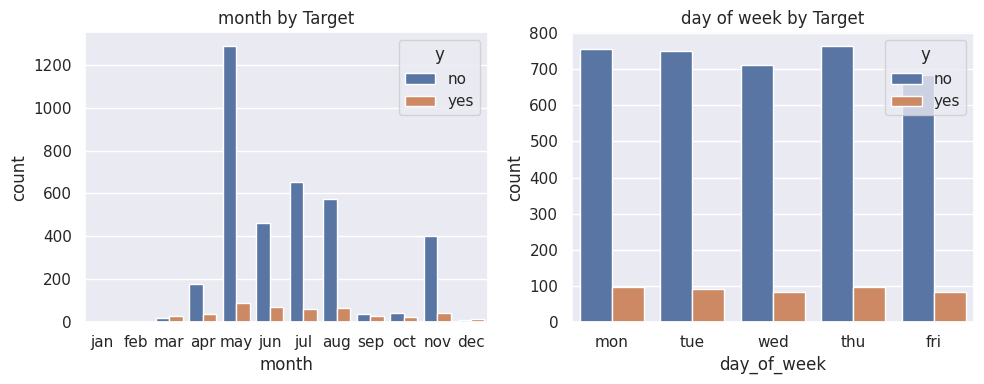

In [86]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

sns.countplot(x='month', hue='y', data=df)
plt.title('month by Target')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', hue='y', data=df)
plt.title('day of week by Target')

plt.tight_layout()
plt.show()

In [87]:
df_agg = df.groupby(['month', 'day_of_week', 'y']).size().reset_index(name='count')
df_agg.head()

,month,day_of_week,y,count
0,jan,mon,no,0
1,jan,mon,yes,0
2,jan,tue,no,0
3,jan,tue,yes,0
4,jan,wed,no,0


In [88]:
fig = go.Figure()

for day in df_agg['day_of_week'].unique():
    data = df_agg[df_agg['day_of_week'] == day]
    fig.add_trace(go.Bar(x=data['month'], y=data['count'], name=day))

fig.update_layout(
    barmode='group',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    title='Grouped Bar Chart of Month and Day of Week vs. Target (y)'
)

fig.show()

Duration column

In [89]:
print(df.groupby('y')['duration'].describe())

      count       mean         std   min    25%    50%    75%     max
y                                                                    
no   3668.0  219.40976  198.256347   0.0   96.0  165.0  274.0  3253.0
yes   451.0  560.78714  411.537717  63.0  255.5  458.0  761.0  3643.0


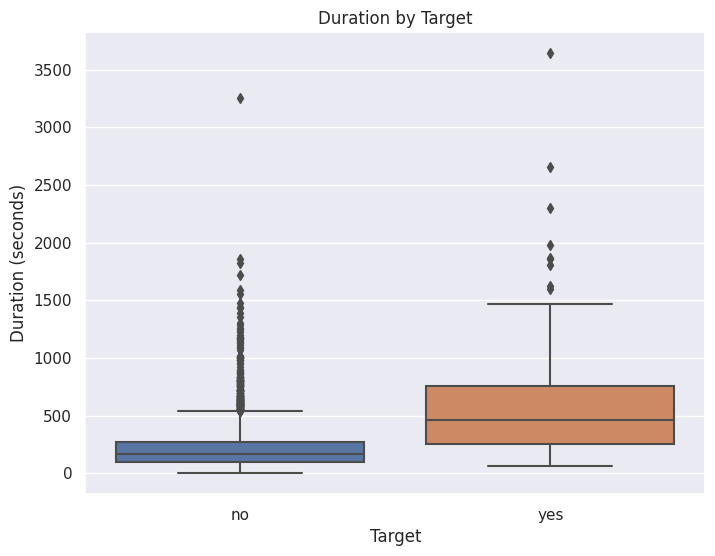

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration by Target')
plt.xlabel('Target')
plt.ylabel('Duration (seconds)')
plt.show()

In [98]:
duration_yes = df[df['y'] == 'yes']['duration']
duration_no = df[df['y'] == 'no']['duration']
t_stat, p_value = stats.ttest_ind(duration_yes, duration_no)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
print("There is a significant difference between 'yes' and ' no' groups.") if p_value < alpha else print("There is no significant difference between 'yes' and 'no' groups.")

T-test statistic: 29.57185726364515
P-value: 1.902622447564083e-174
There is a significant difference between 'yes' and ' no' groups.


In [100]:
num_bins = 15 # You can adjust the number of bins as needed
df['duration_category'] = pd.qcut(df['duration'], q=num_bins, labels=False)

contingency_table = pd.crosstab(df['y'], df['duration_category'])
chi2, p, _, _= chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2}')
print(f'P-value: {p}')

alpha = 0.05
print("There is a significant relationship between 'y' and 'duration_category'.") if p < alpha else print("There is no significant relationship between 'y' and 'duration_category'.")

NameError: ignored

Campaign column

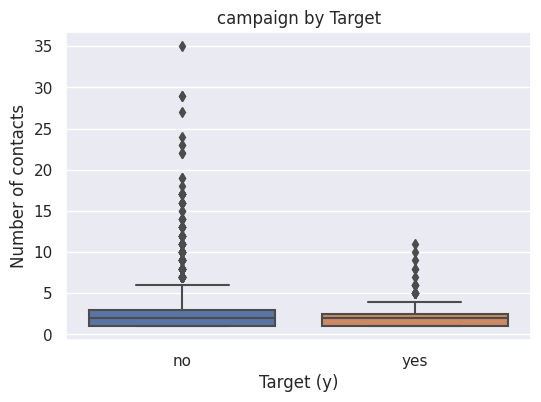

In [101]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='campaign', data=df)
plt.title(f'campaign by Target')
plt.xlabel('Target (y)')
plt.ylabel('Number of contacts')
plt.show()

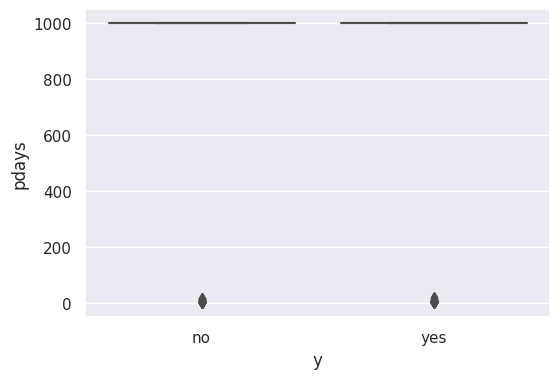

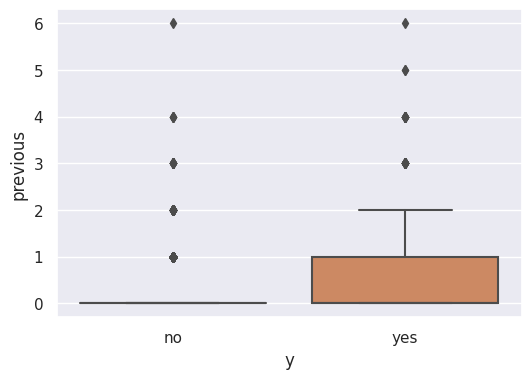

In [102]:
num_feat_01 = ['pdays', 'previous']

for f in num_feat_01:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df['y'], y=df[f])
  plt.show()

In [103]:
df.month.value_counts()

may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
jan       0
feb       0
Name: month, dtype: int64

In [104]:
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0}).astype('int')
df['month_numeric'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12 }).astype('int')

## Pairplot - financial coeff

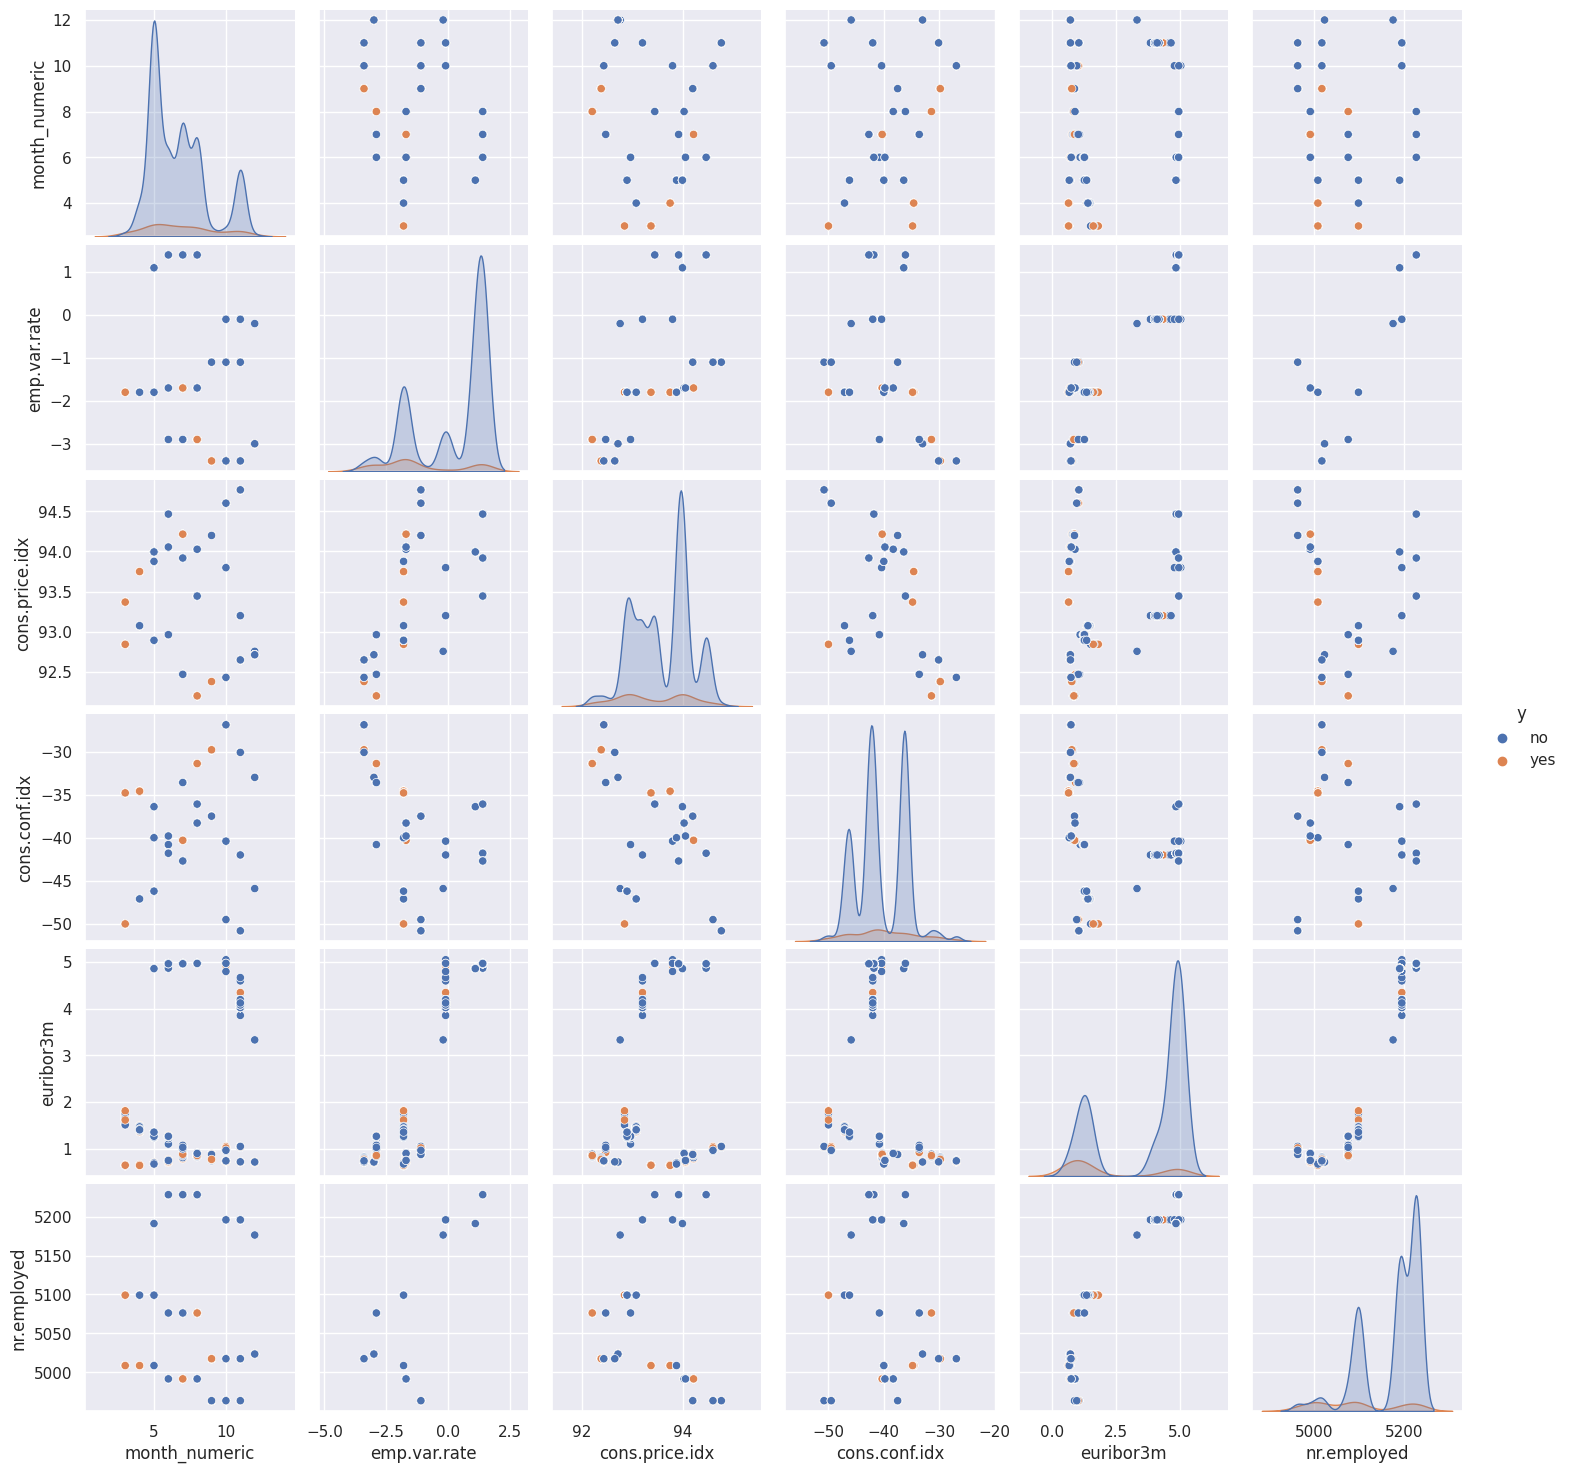

In [105]:
sns.set(rc={"figure.figsize":(32, 12)})

data_coeffs = ['month_numeric', 'emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

sns.pairplot(df[data_coeffs], hue="y")

plt.show()

## Relacje pomiędzy zmiennymi w Data Frame

### Wartości numeryczne między sobą

In [106]:
numerical_features=[col for col in df.select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
print(numerical_features)
print(len(numerical_features))
print(type(numerical_features))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'month_numeric', 'duration_category']
12
<class 'list'>


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'duration'),
  Text(2.5, 0, 'campaign'),
  Text(3.5, 0, 'pdays'),
  Text(4.5, 0, 'previous'),
  Text(5.5, 0, 'emp.var.rate'),
  Text(6.5, 0, 'cons.price.idx'),
  Text(7.5, 0, 'cons.conf.idx'),
  Text(8.5, 0, 'euribor3m'),
  Text(9.5, 0, 'nr.employed'),
  Text(10.5, 0, 'month_numeric'),
  Text(11.5, 0, 'duration_category')])

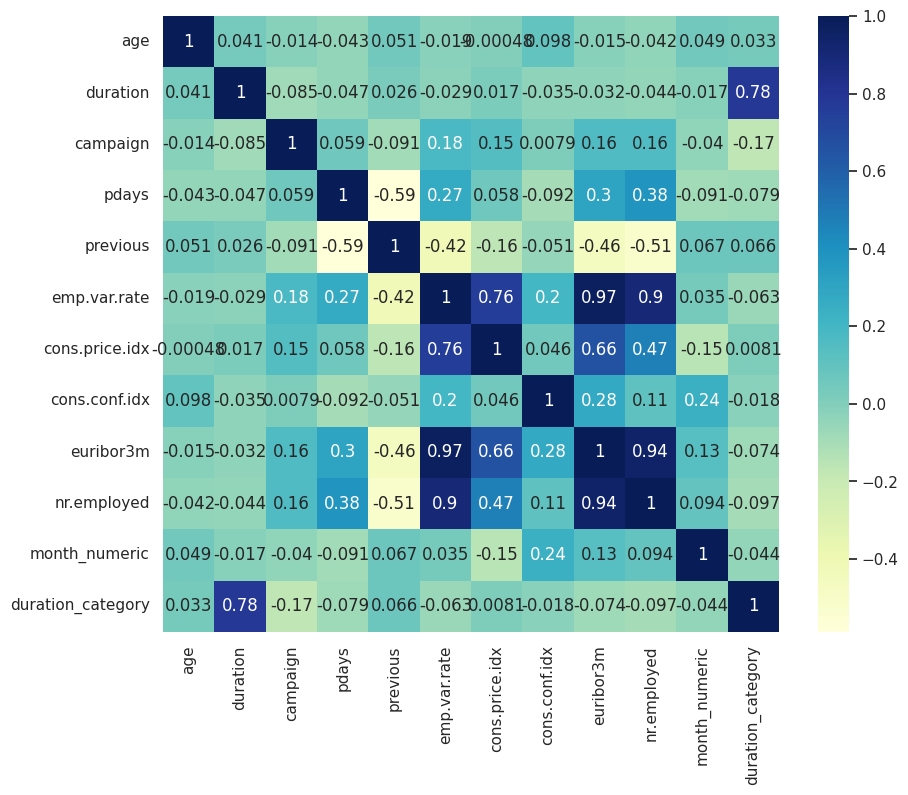

In [107]:
correlations=df[numerical_features].corr()
plt.figure(figsize=(10,8))

sns.heatmap(data=correlations,square=True,annot = True, cmap="YlGnBu")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [108]:
# Calculate and display PPS scores for all pairs of numeric variables
for var1 in numerical_features:
    for var2 in numerical_features:
        if var1 != var2:
            pps_score = pps.score(df, var1, var2)['ppscore']
            print(f'PPS Score between {var1} and {var2}: {pps_score:.2f}')

PPS Score between age and duration: 0.00
PPS Score between age and campaign: 0.00
PPS Score between age and pdays: 0.00
PPS Score between age and previous: 0.00
PPS Score between age and emp.var.rate: 0.00
PPS Score between age and cons.price.idx: 0.00
PPS Score between age and cons.conf.idx: 0.00
PPS Score between age and euribor3m: 0.00
PPS Score between age and nr.employed: 0.00
PPS Score between age and month_numeric: 0.00
PPS Score between age and duration_category: 0.00
PPS Score between duration and age: 0.00
PPS Score between duration and campaign: 0.00
PPS Score between duration and pdays: 0.00
PPS Score between duration and previous: 0.00
PPS Score between duration and emp.var.rate: 0.00
PPS Score between duration and cons.price.idx: 0.00
PPS Score between duration and cons.conf.idx: 0.00
PPS Score between duration and euribor3m: 0.00
PPS Score between duration and nr.employed: 0.00
PPS Score between duration and month_numeric: 0.00
PPS Score between duration and duration_cat

### Wartości numeryczne vs target column

In [109]:
df_copy = df.copy()

In [110]:
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,month_numeric,duration_category
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,5,13
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5,11
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,6,9
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,11,1


In [111]:
y_numeric = df_copy.pop('y_numeric')

In [112]:
X = df_copy
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_numeric,duration_category
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,5,13
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,5,11
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,6,9
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,6,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,11,1


In [113]:
X[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4119 non-null   int64  
 1   duration           4119 non-null   int64  
 2   campaign           4119 non-null   int64  
 3   pdays              4119 non-null   int64  
 4   previous           4119 non-null   int64  
 5   emp.var.rate       4119 non-null   float64
 6   cons.price.idx     4119 non-null   float64
 7   cons.conf.idx      4119 non-null   float64
 8   euribor3m          4119 non-null   float64
 9   nr.employed        4119 non-null   float64
 10  month_numeric      4119 non-null   int64  
 11  duration_category  4119 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 386.3 KB


In [114]:
y_numeric.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4119 entries, 0 to 4118
Series name: y_numeric
Non-Null Count  Dtype
--------------  -----
4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [115]:
# sprawdzenie korelacji między zmiennymi numerycznymi a targetem ('y_numeric')
for f in numerical_features:
  print(f'\nFeature: {f}')
  print(stats.pointbiserialr(X[f], y_numeric))


Feature: age
SignificanceResult(statistic=0.060374082506977636, pvalue=0.00010569353749626029)

Feature: duration
SignificanceResult(statistic=0.4185653682346244, pvalue=1.9026224475643572e-174)

Feature: campaign
SignificanceResult(statistic=-0.07609088294850745, pvalue=1.0131007149573394e-06)

Feature: pdays
SignificanceResult(statistic=-0.3320115339486591, pvalue=1.442855865352259e-106)

Feature: previous
SignificanceResult(statistic=0.25569662959028744, pvalue=1.725690840999725e-62)

Feature: emp.var.rate
SignificanceResult(statistic=-0.2832156765328247, pvalue=7.822982265332988e-77)

Feature: cons.price.idx
SignificanceResult(statistic=-0.09832603241628189, pvalue=2.5500558703296847e-10)

Feature: cons.conf.idx
SignificanceResult(statistic=0.05439301829399087, pvalue=0.0004786306153979258)

Feature: euribor3m
SignificanceResult(statistic=-0.2985649713595469, pvalue=1.4082264365897354e-85)

Feature: nr.employed
SignificanceResult(statistic=-0.3492412340486664, pvalue=1.84212732949

Zgodnie z informacją w danych - korelacja międzu duration - oraz przetworzoną jej formą duration_category mają dużą korleacją pozytywną ze y - z wuagi na specyfikę zmiennje, będzie później usunięta

## Wizualizacja danych kategorycznych

In [116]:
categorical_features = [col for col in df.select_dtypes(include=['object', 'category']).columns if col != 'y']
print(categorical_features)
print(len(categorical_features))
print(type(categorical_features))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
10
<class 'list'>


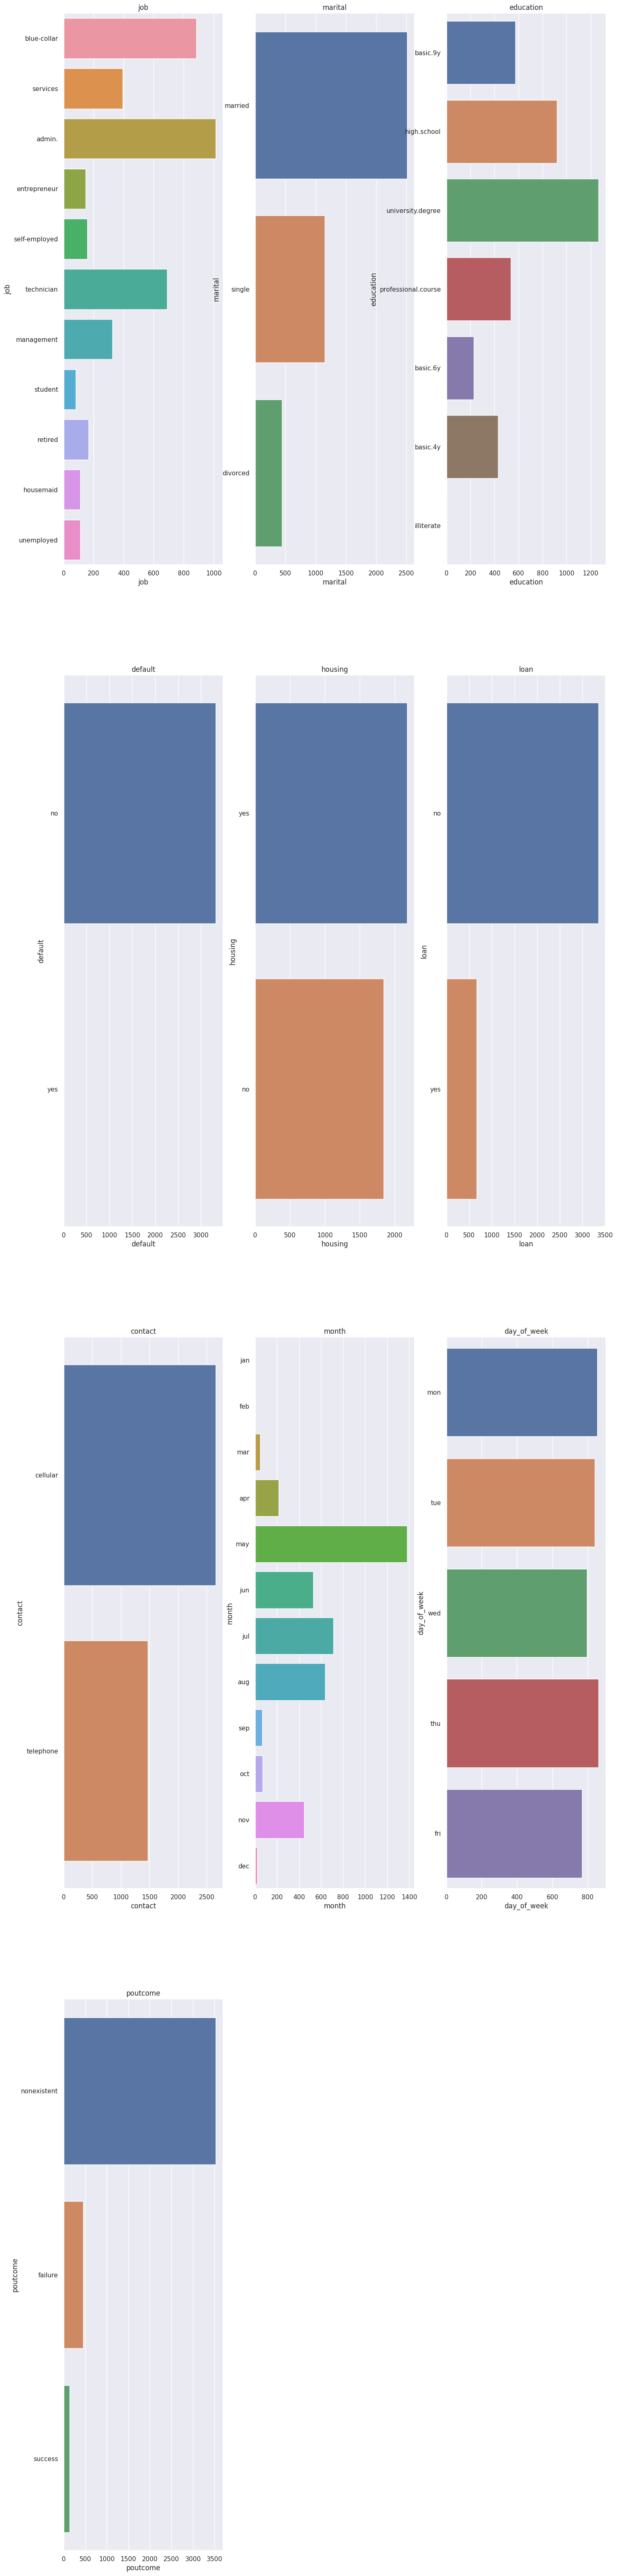

In [117]:
plt.figure(figsize=(17, 80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(4, 3, plotnumber)
    sns.countplot(y=categorical_feature, data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber += 1
plt.show()

### Sprawdzenie relacji między zmiennymi kategorycznymi oraz targetem za pomconą Information gain w decision tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

target_col = 'y'
target = df[target_col]

df_cat_feat = df[categorical_features]

df_encoded = pd.get_dummies(df_cat_feat, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')  # Information Gain criterion
clf.fit(X_train, y_train)

# Get feature importances (information gain)
feature_importance = clf.feature_importances_

# Create a dictionary mapping features to their importance
feature_importance_dict = dict(zip(df_encoded.columns, feature_importance))

# Sort the feature-importance dictionary by information gain
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Print the sorted feature-importance pairs
for feature, info_gain in sorted_feature_importance.items():
    print(f"Feature: {feature}, Information Gain: {info_gain:.4f}")

Feature: poutcome_success, Information Gain: 0.1044
Feature: housing_yes, Information Gain: 0.0708
Feature: loan_yes, Information Gain: 0.0540
Feature: day_of_week_wed, Information Gain: 0.0511
Feature: day_of_week_thu, Information Gain: 0.0450
Feature: job_technician, Information Gain: 0.0399
Feature: day_of_week_fri, Information Gain: 0.0398
Feature: day_of_week_tue, Information Gain: 0.0385
Feature: marital_single, Information Gain: 0.0353
Feature: month_jun, Information Gain: 0.0338
Feature: job_management, Information Gain: 0.0318
Feature: month_may, Information Gain: 0.0308
Feature: marital_married, Information Gain: 0.0289
Feature: contact_telephone, Information Gain: 0.0276
Feature: month_aug, Information Gain: 0.0271
Feature: education_university.degree, Information Gain: 0.0266
Feature: poutcome_nonexistent, Information Gain: 0.0265
Feature: month_nov, Information Gain: 0.0251
Feature: month_jul, Information Gain: 0.0247
Feature: job_services, Information Gain: 0.0231
Feature

In summary, the results suggest that 'poutcome_success',  certain day-of-the-week, housing-related, loan features are the most influential in predicting the target variable 'y'.It is possible to use this information to prioritize feature selection or further investigate the relationships between these features and the target variable in your dataset.

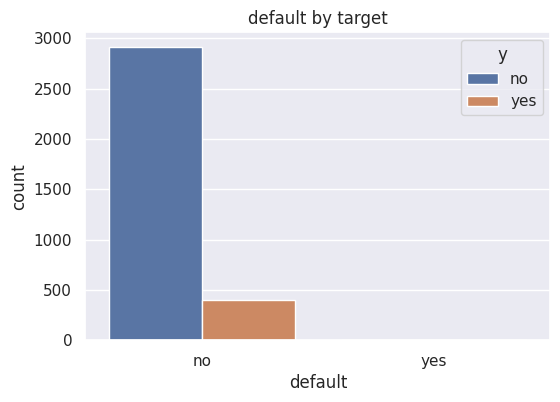

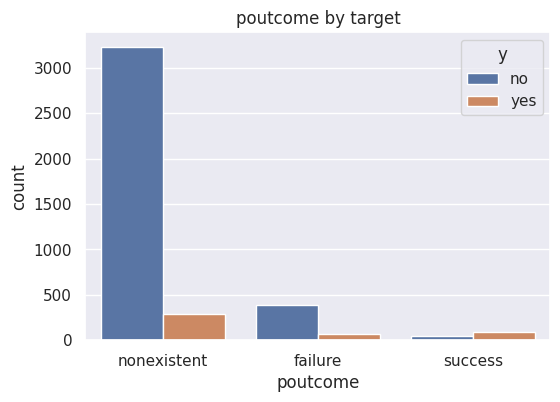

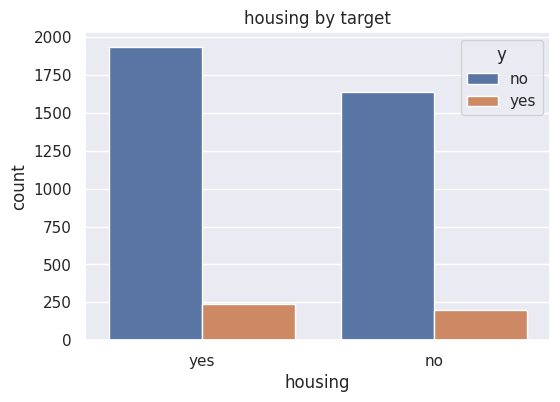

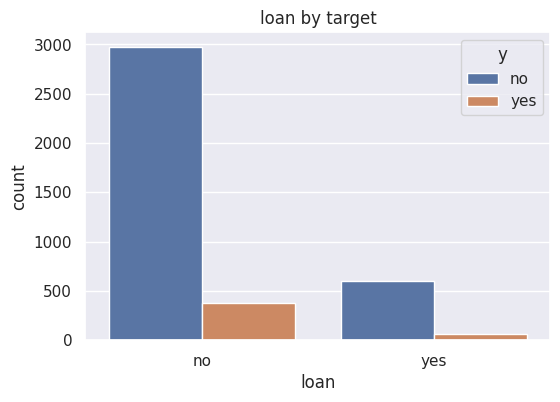

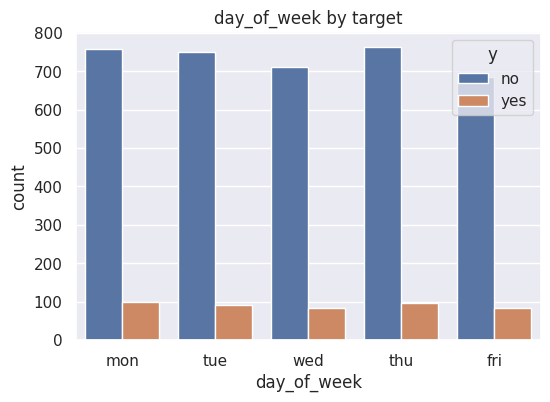

In [119]:
cat_features_vis = ['default', 'poutcome', 'housing', 'loan', 'day_of_week']

for f in cat_features_vis:
  plt.figure(figsize=(6, 4), facecolor='white')
  sns.countplot(x=f, hue='y', data=df)
  print()
  plt.title(f'{f} by target')

## analiza współczynników społecznych / ekonomicznych emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed' - dodanie zmiennej year

zmiana wartości euribor na koszyki / pzostałe waartości również zamieniiono w celu łatiwejszej obserwacji zależności oraz wyłapania zmian w poizomach wskaźników.

In [120]:
# Calculate the minimum and maximum values from the DataFrame
min_value_eur = df['euribor3m'].min()
max_value_eur = df['euribor3m'].max()

# Define the bin width
bin_width = 0.5

bins = np.arange(int(min_value_eur), int(max_value_eur) + bin_width, bin_width)

bins = np.linspace(int(min_value_eur), max_value_eur, num_bins + 1)

df['euribor3m_binned'] = pd.cut(df['euribor3m'], bins=bins, labels=bins[:-1])

In [121]:
print(df['euribor3m_binned'])
print(df['euribor3m'])

0       1.009000
1       4.708667
2       4.708667
3       4.708667
4       4.036000
          ...   
4114    4.708667
4115    4.708667
4116    1.345333
4117    4.708667
4118    4.036000
Name: euribor3m_binned, Length: 4119, dtype: category
Categories (15, float64): [0.000000 < 0.336333 < 0.672667 < 1.009000 ... 3.699667 < 4.036000 < 4.372333 <
                           4.708667]
0       1.313
1       4.855
2       4.962
3       4.959
4       4.191
        ...  
4114    4.958
4115    4.959
4116    1.354
4117    4.966
4118    4.120
Name: euribor3m, Length: 4119, dtype: float64


In [122]:
len(df['euribor3m_binned'].unique())

10

In [123]:
numerical_features.append('euribor3m_binned')

In [124]:
for column in df[numerical_features]:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {', '.join(map(str, unique_values))}")

Unique values in column age: 30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55, 40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54, 59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64, 74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70
Unique values in column duration: 487, 346, 227, 17, 58, 128, 290, 44, 68, 170, 301, 148, 97, 211, 553, 698, 191, 59, 38, 849, 326, 222, 626, 119, 388, 479, 446, 127, 109, 113, 393, 151, 256, 42, 525, 57, 499, 84, 137, 31, 430, 126, 340, 412, 132, 79, 341, 157, 252, 263, 215, 89, 143, 40, 10, 481, 233, 204, 403, 180, 16, 447, 81, 361, 1091, 395, 432, 596, 77, 768, 96, 357, 459, 11, 264, 93, 374, 158, 95, 835, 505, 300, 390, 274, 135, 257, 268, 477, 91, 76, 103, 436, 483, 250, 259, 389, 7, 123, 92, 297, 406, 104, 854, 147, 203, 149, 144, 394, 523, 73, 197, 108, 80, 114, 122, 1161, 181, 239, 360, 314, 984, 663, 141, 706, 797, 311, 63, 111, 49, 171, 242, 279, 246, 309, 168, 153, 152, 90, 117, 640, 

In [125]:
columns_coeff = ['emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed', 'euribor3m_binned']

value_mappings = {}

for column in df[columns_coeff]:
    unique_values = df[column].unique()
    value_mapping = {value: i + 1 for i, value in enumerate(unique_values)}
    value_mappings[column] = value_mapping

for column in df[columns_coeff]:
    new_column_name = f"{column}_updated"
    df[new_column_name] = df[column].map(value_mappings[column])

print(df)

      age          job  marital          education default housing loan  \
0      30  blue-collar  married           basic.9y      no     yes   no   
1      39     services   single        high.school      no      no   no   
2      25     services  married        high.school      no     yes   no   
3      38     services  married           basic.9y      no     NaN  NaN   
4      47       admin.  married  university.degree      no     yes   no   
...   ...          ...      ...                ...     ...     ...  ...   
4114   30       admin.  married           basic.6y      no     yes  yes   
4115   39       admin.  married        high.school      no     yes   no   
4116   27      student   single        high.school      no      no   no   
4117   58       admin.  married        high.school      no      no   no   
4118   34   management   single        high.school      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0      cellular   may    

przyporządkowanie roku wierszom na bazie innych danych - 'euribor3m' oraz kolumny 'month' i reszty istniejących kolumn, analziaując ich zmiany oraz poównując z wartościami rzeczywistaymi (euribor3m) - na bazie zmian wre wskaźnikach można jednoznacznie określić year i month wystąpienia (nie dokładny dzień)

In [126]:
conditions = [
    (df['euribor3m'] > 2.892),
    (df['euribor3m'] > 1.05),
    (df['month_numeric'] == 12),
    ((df['month_numeric'] >= 3) & (df['month_numeric'] <= 6)),
    ((df['month_numeric'] == 7) & (df['nr.employed_updated'] == 7)), # wybieramy lipiec 2009 z wszystkich danych lipcowych
    ((df['month_numeric'] == 8) & (df['nr.employed_updated'] == 7)),
    ((df['month_numeric'] == 9) & (df['nr.employed_updated'] == 9)),
    ((df['month_numeric'] == 10) & (df['nr.employed_updated'] == 9)),
    ((df['month_numeric'] == 11) & (df['nr.employed_updated'] == 9))
]
choices = ['2008', '2009', '2009', '2010', '2009', '2009','2009', '2009', '2009']

df['year'] = pd.np.select(conditions, choices, default='2010')

In [127]:
# dtale.show(df)

### visualization column results for variable 'y' (0/1 binary column) with distribution in month (feature) and year (feature) on 1 chart.

In [128]:
df.groupby(['year', 'month_numeric'])['y_numeric'].count().unstack()

month_numeric,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,
2008,NaN,NaN,758.0,431.0,667.0,528.0,NaN,6.0,386.0,1.0
2009,25.0,201.0,597.0,75.0,14.0,75.0,25.0,43.0,36.0,21.0
2010,23.0,14.0,23.0,24.0,30.0,33.0,39.0,20.0,24.0,NaN


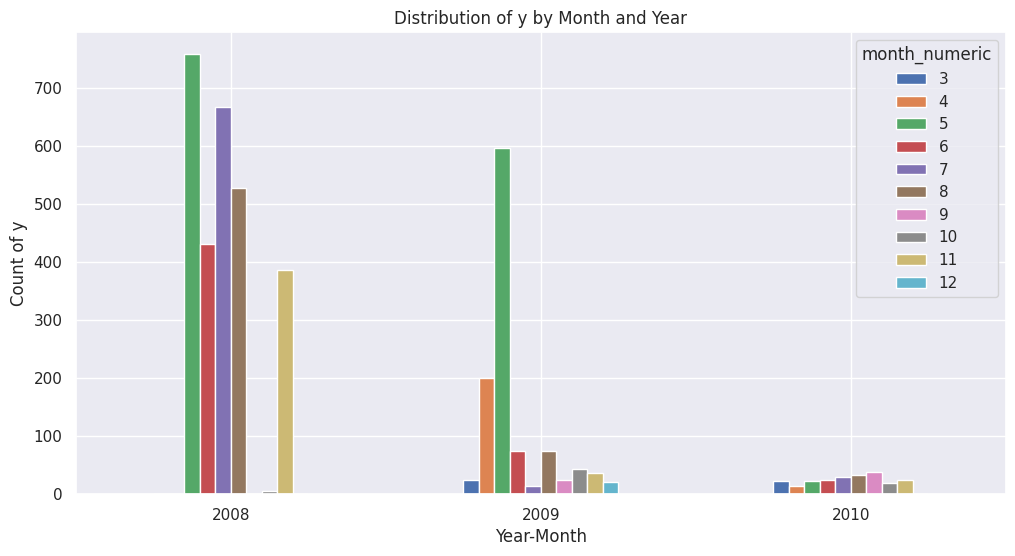

In [129]:
result = df.groupby(['year', 'month_numeric'])['y'].count().unstack(fill_value=0)

result.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of y by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Count of y')
plt.legend(title='month_numeric')
plt.xticks(rotation=0)
plt.show()

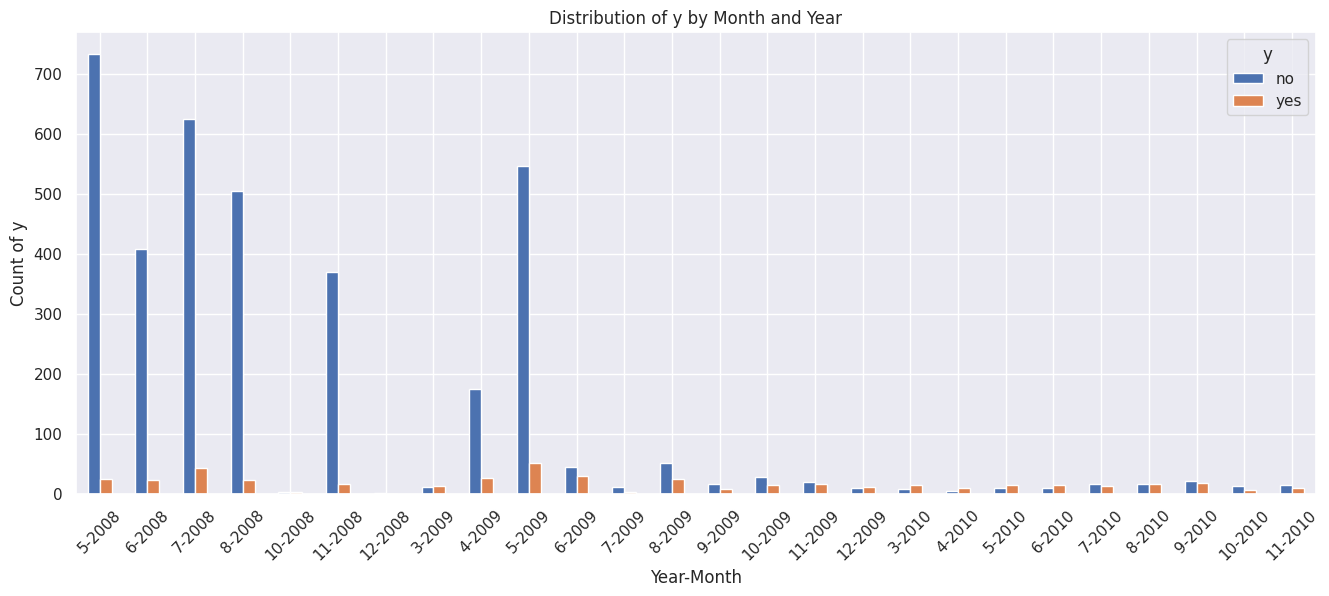

In [130]:
result = df.groupby(['year', 'month_numeric', 'y'])['y'].count().unstack(fill_value=0)

# Create a list of labels with year below each group of months
x_labels = [f"{month}-{year}" for (year, month) in result.index]

# Plot the results as a bar chart
fig, ax = plt.subplots(figsize=(16, 6))  # Extend the width of the chart
result.plot(kind='bar', ax=ax)

# Set x-axis labels (grouping months by year)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

plt.title('Distribution of y by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Count of y')
plt.legend(title='y')
plt.xticks(rotation=45)
plt.show()

In [131]:
df['month_object'] = df['month'].astype(str)

In [132]:
# łączenie kolumn month and w jedną kolumnę
df['month_year'] = df['month_object'] + '_' + df['year'].astype('str')
df['month_year'] = df['month_year'].astype('category')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       4119 non-null   int64   
 1   job                       4080 non-null   object  
 2   marital                   4108 non-null   object  
 3   education                 3952 non-null   object  
 4   default                   3316 non-null   object  
 5   housing                   4014 non-null   object  
 6   loan                      4014 non-null   object  
 7   contact                   4119 non-null   object  
 8   month                     4119 non-null   category
 9   day_of_week               4119 non-null   category
 10  duration                  4119 non-null   int64   
 11  campaign                  4119 non-null   int64   
 12  pdays                     4119 non-null   int64   
 13  previous                  4119 non-null   int64 

In [134]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,month_numeric,duration_category,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object,month_year
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,5,13,1.009000,1,1,1,1,1,1.0,2009,may,may_2009
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5,11,4.708667,2,2,2,2,2,2.0,2008,may,may_2008
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,6,9,4.708667,3,3,3,3,3,2.0,2008,jun,jun_2008
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6,0,4.708667,3,3,3,4,3,2.0,2008,jun,jun_2008
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,11,1,4.036000,4,4,4,5,4,3.0,2008,nov,nov_2008


# Data Preprocessing

## Wartości null

Łącznie mamy 1029 wierszy z wartościami null (niektóre w kilku kolumnach)
Dla 5 kolumn kategorycznych  wartości nulls są zdecydowaną mniejszością (od 1% od 4% wierszy) - dla nich uzupełnię nulle wartością zmiennej najczęście spotykaną.
Dla Kolumny 'default' aż 803 rekordy (19%) stanowią wartości null - będzie później usunięta.

In [135]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [136]:
df.isnull().sum()

age                           0
job                           0
marital                       0
education                     0
default                     803
housing                       0
loan                          0
contact                       0
month                         0
day_of_week                   0
duration                      0
campaign                      0
pdays                         0
previous                      0
poutcome                      0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
y                             0
y_numeric                     0
month_numeric                 0
duration_category             0
euribor3m_binned              0
emp.var.rate_updated          0
cons.price.idx_updated        0
cons.conf.idx_updated         0
euribor3m_updated             0
nr.employed_updated           0
euribor3m_binned_updated      0
year    

Strukura kolumny 'default', nie pozwala jej wziąć do modelowania - tylko 1 wartośći z kategorii 'yes', 1/5 wartości to nulls, nie zależy również od informacji w innych kolumnach

In [137]:
df['default'].value_counts()

no     3315
yes       1
Name: default, dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       4119 non-null   int64   
 1   job                       4119 non-null   object  
 2   marital                   4119 non-null   object  
 3   education                 4119 non-null   object  
 4   default                   3316 non-null   object  
 5   housing                   4119 non-null   object  
 6   loan                      4119 non-null   object  
 7   contact                   4119 non-null   object  
 8   month                     4119 non-null   category
 9   day_of_week               4119 non-null   category
 10  duration                  4119 non-null   int64   
 11  campaign                  4119 non-null   int64   
 12  pdays                     4119 non-null   int64   
 13  previous                  4119 non-null   int64 

## Podział danych na zbiór treningowy i testowy

In [139]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,month_numeric,duration_category,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object,month_year
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,5,13,1.009000,1,1,1,1,1,1.0,2009,may,may_2009
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5,11,4.708667,2,2,2,2,2,2.0,2008,may,may_2008
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,6,9,4.708667,3,3,3,3,3,2.0,2008,jun,jun_2008
3,38,services,married,basic.9y,no,admin.,admin.,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6,0,4.708667,3,3,3,4,3,2.0,2008,jun,jun_2008
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,11,1,4.036000,4,4,4,5,4,3.0,2008,nov,nov_2008



* w listach zapisane zmienne zmienne do późniejszego modelowania
* zmienna duration nie moze brać udział w trnowaniu danych - długośź połączenia nie jest znana przed jego wykonaniem, zatem przy liście zmiennych pomijamy zmienną 'duration'

### Zestaw danych nr 1

In [140]:
model_columns = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
      'y_numeric']

print(len(model_columns))
print(model_columns)

19
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']


In [141]:
data = df[model_columns]
y = data.pop('y_numeric')
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [142]:
X = data
X.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,admin.,admin.,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   int64   
 1   job             4119 non-null   object  
 2   marital         4119 non-null   object  
 3   education       4119 non-null   object  
 4   housing         4119 non-null   object  
 5   loan            4119 non-null   object  
 6   contact         4119 non-null   object  
 7   month           4119 non-null   category
 8   day_of_week     4119 non-null   category
 9   campaign        4119 non-null   int64   
 10  pdays           4119 non-null   int64   
 11  previous        4119 non-null   int64   
 12  poutcome        4119 non-null   object  
 13  emp.var.rate    4119 non-null   float64 
 14  cons.price.idx  4119 non-null   float64 
 15  cons.conf.idx   4119 non-null   float64 
 16  euribor3m       4119 non-null   float64 
 17  nr.employed   

In [144]:
num_feat = [col for col in df[model_columns].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']

cat_feat = [col for col in df[model_columns].select_dtypes(include=['object']).columns if col != 'y']

ord_feat = [col for col in df[model_columns].select_dtypes(include=['category']).columns if col != 'y']

print(f'No. of numerical features: {len(num_feat)}')
print(num_feat)
print()
print(f'No. of categorical features: {len(cat_feat)}')
print(cat_feat)
print()
print(f'No. of ordinal features: {len(ord_feat)}')
print(ord_feat)

No. of numerical features: 9
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['month', 'day_of_week']


In [145]:
# ord_feat = [col for col in df[model_columns].select_dtypes(include=['category']).columns if col != 'y']

In [146]:
# ord_feat

In [147]:
seed = 23

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [149]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3295, 18), (3295,), (824, 18), (824,))

In [150]:
y_train.value_counts()

0    2934
1     361
Name: y_numeric, dtype: int64

In [151]:
361 / (2934+361)

0.10955993930197269

In [152]:
y_test.value_counts()

0    734
1     90
Name: y_numeric, dtype: int64

## Feature Importance - RandomForestClassifier() - Zestaw danych nr 1

In [153]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat),
        ('ordinal', ordinal_transformer, ord_feat)
    ]
)

rfc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model', RandomForestClassifier(random_state=seed))])

In [154]:
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7c49c6e2a4a0>)]),
                                                  ['month', 'day_of_week'])])),
                ('rfc_model', RandomForestClassifier(random_state=23))])

In [155]:
feature_importance = rfc_pipeline.steps[-1][1].feature_importances_
all_column_names = X_train.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance: 

 age: 0.026470721797016886
 emp.var.rate: 0.025748390320210243
 cons.price.idx: 0.024999627304387997
 campaign: 0.022470702444370362
 housing: 0.018384364313955917
 month: 0.017760638394431993
 job: 0.01621121844659983
 poutcome: 0.01570832272775445
 euribor3m: 0.015503804087756952
 loan: 0.013337234725216078
 cons.conf.idx: 0.012377842739130798
 day_of_week: 0.010580294044588488
 pdays: 0.009835555202227094
 nr.employed: 0.009386148772101744
 contact: 0.008961679586433114
 marital: 0.007240602926299805
 education: 0.007083976929504337
 previous: 0.0004292342416471478


### Zestaw danych nr 2

z nowo stworzoną zmienną month_year oraz wybranym 1 z 5 wskaźników finansowych  wuagi na ich wysoką kolerację i wspólne zależności (ppsscore) )

In [156]:
model_columns_2 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome',
       'month_year', 'y_numeric']

print(len(model_columns_2))
print(model_columns_2)

14
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'month_year', 'y_numeric']


In [157]:
data_2 = df[model_columns_2]

In [158]:
y_2 = data_2.pop('y_numeric')
y_2

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [159]:
X_2 = data_2
X_2.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,month_year
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,may_2009
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,may_2008
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,jun_2008
3,38,services,married,basic.9y,admin.,admin.,telephone,fri,3,999,0,nonexistent,jun_2008
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,nov_2008


In [160]:
num_feat_2 = [col for col in df[model_columns_2].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_2 = [col for col in df[model_columns_2].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_2 = [col for col in df[model_columns_2].select_dtypes(include=['category']).columns if col != 'y']
print(f'No. of numerical features: {len(num_feat_2)}')
print(num_feat_2)
print()
print(f'No. of categorical features: {len(cat_feat_2)}')
print(cat_feat_2)
print()
print(f'No. of ordinal features: {len(ord_feat_2)}')
print(ord_feat_2)

No. of numerical features: 4
['age', 'campaign', 'pdays', 'previous']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['day_of_week', 'month_year']


In [161]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=seed, stratify=y)

In [162]:
X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((3295, 13), (3295,), (824, 13), (824,))

In [163]:
y_train_2.value_counts()

0    2934
1     361
Name: y_numeric, dtype: int64

In [164]:
361 / (2934+361)

0.10955993930197269

In [165]:
y_test_2.value_counts()

0    734
1     90
Name: y_numeric, dtype: int64

In [166]:
90 / (734+90)

0.10922330097087378

## Feature Importance - RandomForestClassifier() - Zestaw danych nr 2

In [167]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat_2),
        ('ordinal', ordinal_transformer, ord_feat_2)
    ]
)

rfc_pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model_2', RandomForestClassifier(random_state=seed))])

In [168]:
rfc_pipeline_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7c49c6e419c0>)]),
                                                  ['day_of_week',
                                                   'month_year'])])),
                ('rfc_model_2', RandomForestClassifier(random_state=23))])

In [169]:
feature_importance = rfc_pipeline_2.steps[-1][1].feature_importances_
all_column_names = X_train_2.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance - zestaw danych 2: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance - zestaw danych 2: 

 age: 0.02543849309174528
 pdays: 0.021529728277326358
 day_of_week: 0.017073542865460256
 housing: 0.016051865657051096
 job: 0.015219849678849571
 month_year: 0.01454672299160436
 loan: 0.013126081653233616
 previous: 0.010621347587241467
 campaign: 0.009593858837670501
 contact: 0.008915612783060516
 marital: 0.006354071124580236
 education: 0.005522337201493888
 poutcome: 0.00039567454743137816


In [170]:
# stop

### Zestaw danych 3

-  pozostawiono 2 zmienne społeczono - ekonomiczne wybrane ze względu na ich istotność (oraz niższy niż inne skorelowanie)

In [171]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,month_numeric,duration_category,euribor3m_binned,emp.var.rate_updated,cons.price.idx_updated,cons.conf.idx_updated,euribor3m_updated,nr.employed_updated,euribor3m_binned_updated,year,month_object,month_year
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,5,13,1.009000,1,1,1,1,1,1.0,2009,may,may_2009
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,5,11,4.708667,2,2,2,2,2,2.0,2008,may,may_2008
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,6,9,4.708667,3,3,3,3,3,2.0,2008,jun,jun_2008
3,38,services,married,basic.9y,no,admin.,admin.,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,6,0,4.708667,3,3,3,4,3,2.0,2008,jun,jun_2008
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,11,1,4.036000,4,4,4,5,4,3.0,2008,nov,nov_2008


In [172]:
model_columns_3 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.conf.idx', 'emp.var.rate',
        'y_numeric']

print(len(model_columns_3))
print(model_columns_3)

15
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.conf.idx', 'emp.var.rate', 'y_numeric']


In [173]:
data_3 = df[model_columns_3]

y_3 = data_3.pop('y_numeric')
y_3

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [174]:
X_3 = data_3
X_3.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,emp.var.rate
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,-46.2,-1.8
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,-36.4,1.1
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,-41.8,1.4
3,38,services,married,basic.9y,admin.,admin.,telephone,fri,3,999,0,nonexistent,-41.8,1.4
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,-42.0,-0.1


In [175]:
num_feat_3 = [col for col in df[model_columns_3].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_3 = [col for col in df[model_columns_3].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_3 = [col for col in df[model_columns_3].select_dtypes(include=['category']).columns if col != 'y']
print(f'No. of numerical features: {len(num_feat_3)}')
print(num_feat_3)
print()
print(f'No. of categorical features: {len(cat_feat_3)}')
print(cat_feat_3)
print()
print(f'No. of ordinal features: {len(ord_feat_3)}')
print(ord_feat_3)

No. of numerical features: 6
['age', 'campaign', 'pdays', 'previous', 'cons.conf.idx', 'emp.var.rate']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 1
['day_of_week']


In [176]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=seed, stratify=y)

X_train_3.shape, y_train_3.shape, X_test_3.shape, y_test_3.shape

((3295, 14), (3295,), (824, 14), (824,))

In [177]:
print(y_train_3.value_counts())

0    2934
1     361
Name: y_numeric, dtype: int64


In [178]:
print(y_test_3.value_counts())

0    734
1     90
Name: y_numeric, dtype: int64


## Feature Importance - RandomForestClassifier() - Zestaw danych nr 3

In [179]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat_3),
        ('ordinal', ordinal_transformer, ord_feat_3)
    ]
)

rfc_pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model_3', RandomForestClassifier(random_state=seed))])

In [180]:
rfc_pipeline_3.fit(X_train_3, y_train_3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7c49cc6f2fe0>)]),
                                                  ['day_of_week'])])),
                ('rfc_model_3', RandomForestClassifier(random_state=23))])

In [181]:
feature_importance = rfc_pipeline_3.steps[-1][1].feature_importances_
all_column_names = X_train_3.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance - zestaw danych 3: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance - zestaw danych 3: 

 emp.var.rate: 0.02988091879644315
 pdays: 0.02974326995952292
 age: 0.028827775710110255
 job: 0.021597068113747647
 day_of_week: 0.021058552071880704
 cons.conf.idx: 0.020227566009812445
 housing: 0.01900705476136792
 loan: 0.017024071297160118
 previous: 0.014973990453422485
 contact: 0.012539851127491508
 campaign: 0.01196582649272758
 education: 0.009403050274347192
 marital: 0.00882177491031598
 poutcome: 0.00047958900526963764


### Zestaw danych 4

- mix 2 i 3 zestawu - month_year zostawiony +  pozostawiono 2 zmienne społeczono - ekonomiczne wybrane ze względu na ich istotność (2, które mają najniższą korelację i wpły na siebie)

In [182]:
model_columns_4 = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'emp.var.rate', 'month_year',
        'y_numeric']

In [183]:
print(len(model_columns_4))
print(model_columns_4)

16
['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'month_year', 'y_numeric']


In [184]:
data_4 = df[model_columns_4]

In [185]:
y_4 = data_4.pop('y_numeric')
y_4

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_numeric, Length: 4119, dtype: int64

In [186]:
X_4 = data_4
X_4.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,emp.var.rate,month_year
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,92.893,-1.8,may_2009
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,93.994,1.1,may_2008
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,94.465,1.4,jun_2008
3,38,services,married,basic.9y,admin.,admin.,telephone,fri,3,999,0,nonexistent,94.465,1.4,jun_2008
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,93.200,-0.1,nov_2008


In [187]:
num_feat_4 = [col for col in df[model_columns_4].select_dtypes(include=['integer', 'float']).columns if col != 'y_numeric']
cat_feat_4 = [col for col in df[model_columns_4].select_dtypes(include=['object']).columns if col != 'y']
ord_feat_4 = [col for col in df[model_columns_4].select_dtypes(include=['category']).columns if col != 'y']
print(f'No. of numerical features: {len(num_feat_4)}')
print(num_feat_4)
print()
print(f'No. of categorical features: {len(cat_feat_4)}')
print(cat_feat_4)
print()
print(f'No. of ordinal features: {len(ord_feat_4)}')
print(ord_feat_4)

No. of numerical features: 6
['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'emp.var.rate']

No. of categorical features: 7
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

No. of ordinal features: 2
['day_of_week', 'month_year']


In [188]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=seed, stratify=y)

In [189]:
X_train_4.shape, y_train_4.shape, X_test_4.shape, y_test_4.shape

((3295, 15), (3295,), (824, 15), (824,))

In [190]:
y_train_4.value_counts()

0    2934
1     361
Name: y_numeric, dtype: int64

In [191]:
y_test_4.value_counts()

0    734
1     90
Name: y_numeric, dtype: int64

## Feature Importance - RandomForestClassifier() - Zestaw danych nr 4

In [192]:
categorical_transformer = Pipeline(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, cat_feat_3),
        ('ordinal', ordinal_transformer, ord_feat_3)
    ]
)

rfc_pipeline_4 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rfc_model_4', RandomForestClassifier(random_state=seed))])

In [193]:
rfc_pipeline_4.fit(X_train_4, y_train_4)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('label_encoder',
                                                                   <__main__.LabelEncoderTransformer object at 0x7c49c6f89120>)]),
                                                  ['day_of_week'])])),
                ('rfc_model_4', RandomForestClassifier(random_state=23))])

In [194]:
feature_importance = rfc_pipeline_4.steps[-1][1].feature_importances_
all_column_names = X_train_4.columns

importance_tuples = [(col, imp) for col, imp in zip(all_column_names, feature_importance)]

# Sort the list by feature importance in descending order
rfc_pre_sorted_importance = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

# Print feature importance values for each column in descending order
print('Random Forest Feature Importance - zestaw danych 3: \n')
for column, importance in rfc_pre_sorted_importance:
    print(f" {column}: {importance}")

Random Forest Feature Importance - zestaw danych 3: 

 emp.var.rate: 0.02988091879644315
 pdays: 0.02974326995952292
 age: 0.028827775710110255
 month_year: 0.028592278338211773
 job: 0.021597068113747647
 day_of_week: 0.021058552071880704
 cons.price.idx: 0.020227566009812445
 housing: 0.01900705476136792
 loan: 0.017024071297160118
 previous: 0.014973990453422485
 contact: 0.012539851127491508
 campaign: 0.01196582649272758
 education: 0.009403050274347192
 marital: 0.00882177491031598
 poutcome: 0.00047958900526963764


In [195]:
# stop

#Modelowanie

Realtywnie największy wpływ przy każdym sprawdzeniu mają mają kolumny:

*

In [196]:
# import csv

# file_path = 'data_rfc_pre.csv'

# # Open the CSV file for writing
# with open(file_path, 'w', newline='') as file:
#     writer = csv.writer(file)

#     # Write the data to the CSV file
#     for row in rfc_pre_sorted_importance:
#         writer.writerow(row)

## Baseline Random Forest Classifier - zestaw 1

Komentarz do baseline

In [197]:
X_test_data = X_test
y_test_data = y_test

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.67      0.20      0.31        90

    accuracy                           0.90       824
   macro avg       0.79      0.59      0.63       824
weighted avg       0.88      0.90      0.88       824



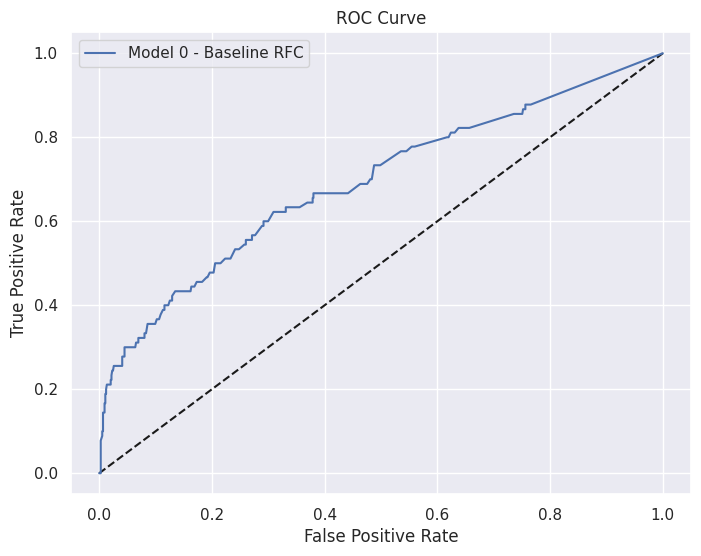

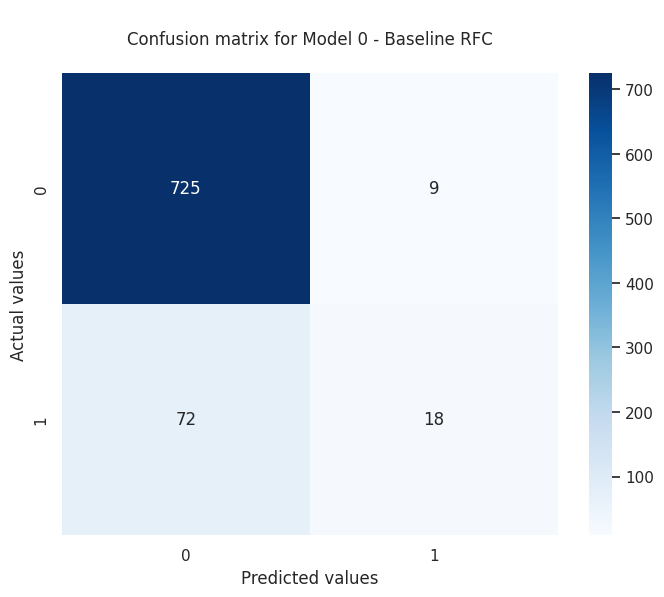

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243


In [198]:
sns.set(rc={"figure.figsize":(8, 6)})
calculation_metrics(rfc_pipeline, 'Model 0 - Baseline RFC')

In [199]:
# stop

## Model 1 - Logistic Regression zestaw danych 1


* z użyciem zestawu danych nr 1 wraz SMOTE (oversampling danych - przeciwdziałanie niezbalansowaniu - widoczny słabe wyniki prognozy w mniej licznej klasie) - dodanie również StandardScaler() - celem jest sprawdzenie feature importance dla wskaźników finansowych


In [200]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ]
)

lr_pipeline = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model', LogisticRegression(random_state=seed))])

In [201]:
lr_param_grid = {
    'smote__sampling_strategy': [ 'minority', 'all', 0.5, 0.8, 0.9],
    'smote__k_neighbors': [2, 3, 5],
    'lr_model__C': [0.001, 0.01, 0.1],
    'lr_model__penalty': ['l1', 'l2', 'none'],
    'lr_model__max_iter': [15, 25, 50],
}

In [202]:
lr_model_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline,
                                       param_grid = lr_param_grid,
                                       scoring='f1_weighted',
                                      #  error_score='raise',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_gridsearch.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 405
n_resources: 40
Fitting 10 folds for each of 405 candidates, totalling 4050 fits
----------
iter: 1
n_candidates: 135
n_resources: 120
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
----------
iter: 2
n_candidates: 45
n_resources: 360
Fitting 10 folds for each of 45 candidates, totalling 450 fits
----------
iter: 3
n_candidates: 15
n_resources: 1080
Fitting 10 folds for each of 15 candidates, totalling 150 fits
----------
iter: 4
n_candidates: 5
n_resources: 3240
Fitting 10 folds for each of 5 candidates, totalling 50 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49c700b970>...
                                                                                 'nr.employed'])])),
                                              ('smote', SMOTE(random_state=23)),
                                              ('lr_model',
                                               LogisticRegression(random_state=23))]),
                    n_jobs=-1,
                    param_grid={'lr_model__C': [0.001, 0.01, 0.1],
                                'lr_model__max_iter': [15, 25, 50],
                                'lr_model__penalty': ['l1', 'l2', 'none'],
                                'smote__k_neighbors': [2, 3, 5],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.5, 0.8, 0.9]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [203]:
print('\nBest hyperparameter:', lr_model_gridsearch.best_params_)


Best hyperparameter: {'lr_model__C': 0.01, 'lr_model__max_iter': 15, 'lr_model__penalty': 'none', 'smote__k_neighbors': 3, 'smote__sampling_strategy': 0.5}


In [204]:
lr_model = lr_model_gridsearch.best_estimator_

In [205]:
X_test_data = X_test
y_test = y_test

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       734
           1       0.47      0.51      0.49        90

    accuracy                           0.88       824
   macro avg       0.71      0.72      0.71       824
weighted avg       0.89      0.88      0.89       824



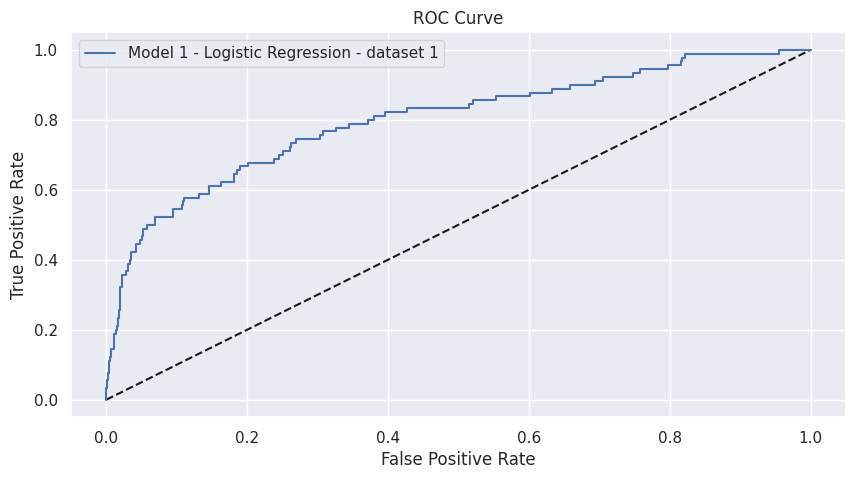

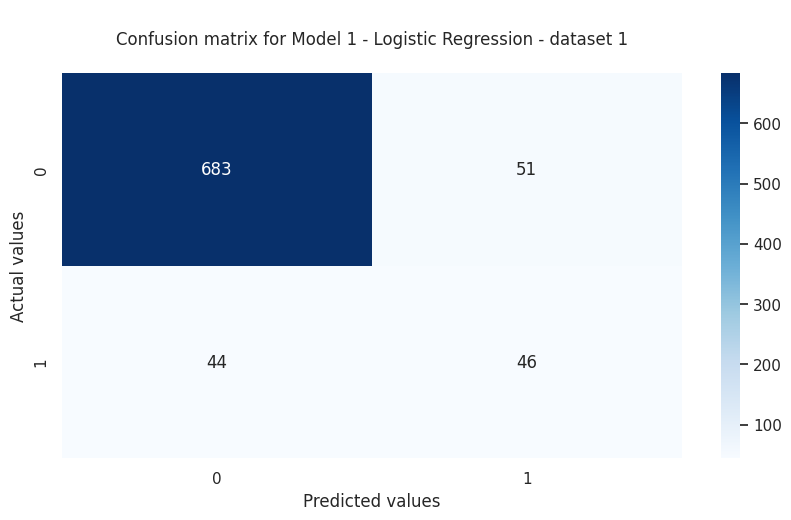

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379


In [206]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model, 'Model 1 - Logistic Regression - dataset 1')

In [207]:
# stop

### Sprawdzenie istotności cech na bazie Regresji Logistycznej - zestaw 1

In [208]:
training_features = list(model_columns)
training_features.remove('y_numeric')

In [209]:
training_features

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [210]:
calculate_and_print_feature_importance(lr_model, training_features)

Feature: housing, Importance: 0.4769839564832306
Feature: age, Importance: 0.4213174605221775
Feature: poutcome, Importance: 0.33364786164226823
Feature: contact, Importance: 0.23309975559210389
Feature: education, Importance: 0.22781415592265353
Feature: euribor3m, Importance: 0.22183554403572212
Feature: campaign, Importance: 0.22068035083293067
Feature: marital, Importance: 0.2156264579116916
Feature: month, Importance: 0.20010103055722628
Feature: pdays, Importance: 0.19057402269237433
Feature: nr.employed, Importance: 0.1783677581377959
Feature: cons.price.idx, Importance: 0.13137844545134716
Feature: loan, Importance: 0.09282792826352744
Feature: job, Importance: 0.09188453204987972
Feature: previous, Importance: 0.07502558423646587
Feature: day_of_week, Importance: 0.02945066669556
Feature: cons.conf.idx, Importance: 0.01426659922249989
Feature: emp.var.rate, Importance: 0.011395693998540811


## Model 2 - Logistic Regression zestaw danych 2

In [211]:
# Model 2 - Logistic Regression zestaw 2

# * z kolumną year oraz wybranym najważniejszym wskaźnikiem finansowym

In [212]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_2),
        ('ordinal_transformer', ordinal_transformer, ord_feat_2),
        ('numeric_transformer', numeric_transformer, num_feat_2)
    ]
)

lr_pipeline_2 = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model_2', LogisticRegression(random_state=seed))])

In [213]:
lr_param_grid_2 = {
    'smote__sampling_strategy': [ 'minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors': [3, 4, 5],
    'lr_model_2__C': [0.001, 0.01, 0.1],
    'lr_model_2__penalty': ['l1', 'l2', 'none'],
    'lr_model_2__max_iter': [4, 8, 15, 25]
}

In [214]:
lr_model_2_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline_2,
                                       param_grid = lr_param_grid_2,
                                       scoring='f1_weighted',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_2_gridsearch.fit(X_train_2, y_train_2)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 540
n_resources: 40
Fitting 10 folds for each of 540 candidates, totalling 5400 fits
----------
iter: 1
n_candidates: 180
n_resources: 120
Fitting 10 folds for each of 180 candidates, totalling 1800 fits
----------
iter: 2
n_candidates: 60
n_resources: 360
Fitting 10 folds for each of 60 candidates, totalling 600 fits
----------
iter: 3
n_candidates: 20
n_resources: 1080
Fitting 10 folds for each of 20 candidates, totalling 200 fits
----------
iter: 4
n_candidates: 7
n_resources: 3240
Fitting 10 folds for each of 7 candidates, totalling 70 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49c741e6b0>...
                                              ('smote', SMOTE(random_state=23)),
                                              ('lr_model_2',
                                               LogisticRegression(random_state=23))]),
                    n_jobs=-1,
                    param_grid={'lr_model_2__C': [0.001, 0.01, 0.1],
                                'lr_model_2__max_iter': [4, 8, 15, 25],
                                'lr_model_2__penalty': ['l1', 'l2', 'none'],
                                'smote__k_neighbors': [3, 4, 5],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5, 0.8]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [215]:
print('\nBest hyperparameter:', lr_model_2_gridsearch.best_params_)


Best hyperparameter: {'lr_model_2__C': 0.01, 'lr_model_2__max_iter': 8, 'lr_model_2__penalty': 'none', 'smote__k_neighbors': 4, 'smote__sampling_strategy': 0.3}


In [216]:
lr_model_2 = lr_model_2_gridsearch.best_estimator_

In [217]:
X_test_data = X_test_2
y_test_data = y_test_2

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.68      0.23      0.35        90

    accuracy                           0.90       824
   macro avg       0.80      0.61      0.65       824
weighted avg       0.89      0.90      0.88       824



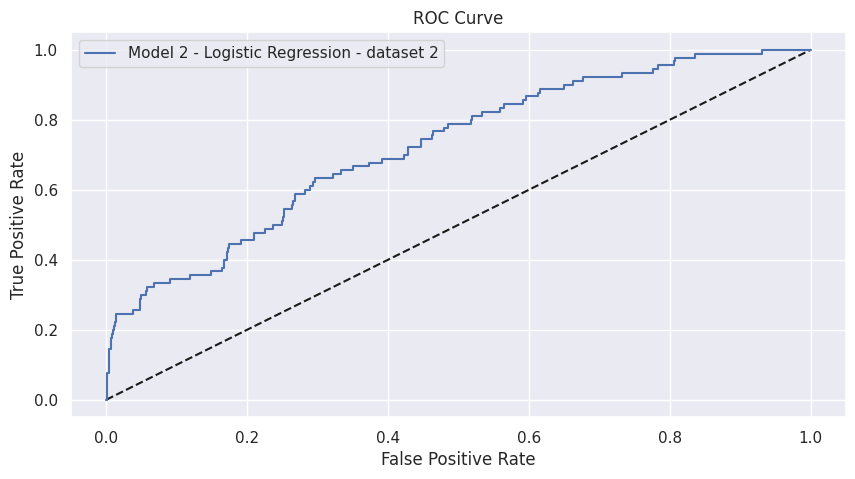

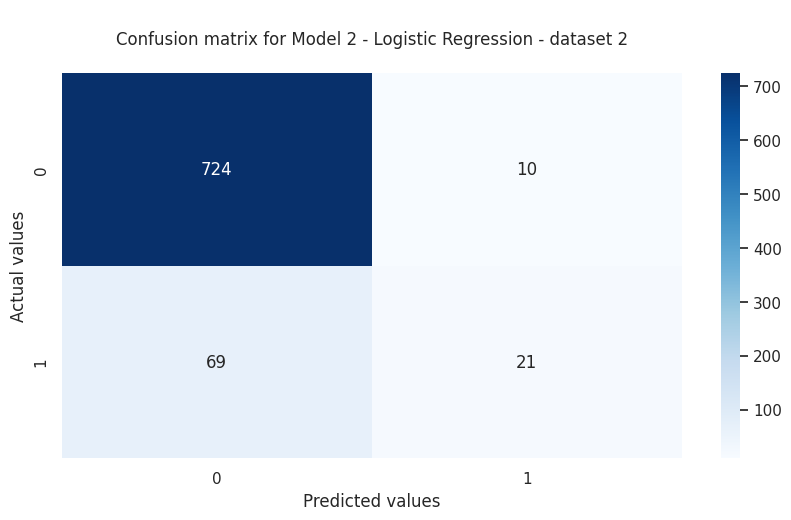

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404


In [218]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model_2, 'Model 2 - Logistic Regression - dataset 2')

In [219]:
# stop

### Istotność cech Logistic Regression zestaw danych 2

In [220]:
training_features_2 = list(model_columns_2)
training_features_2.remove('y_numeric')
training_features_2

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'month_year']

In [221]:
calculate_and_print_feature_importance(lr_model_2, training_features_2)

Feature: job, Importance: 0.10250457216749895
Feature: month_year, Importance: 0.05540226543382963
Feature: housing, Importance: 0.044908638411484764
Feature: day_of_week, Importance: 0.033137884457518245
Feature: marital, Importance: 0.030733222805116225
Feature: pdays, Importance: 0.027226143452938157
Feature: campaign, Importance: 0.024223282946859867
Feature: loan, Importance: 0.019680105386319646
Feature: contact, Importance: 0.01940830721058137
Feature: education, Importance: 0.014332422894666772
Feature: previous, Importance: 0.0047716569072463
Feature: poutcome, Importance: 0.0041940540240989355
Feature: age, Importance: 0.00023380283983521176


In [222]:
# stop

## Model 3 - Logistic Regression zestaw danych 3

In [223]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_3),
        ('ordinal_transformer', ordinal_transformer, ord_feat_3),
        ('numeric_transformer', numeric_transformer, num_feat_3)
    ]
)

lr_pipeline_3 = Pipeline_imb(steps=[('preprocessor', preprocessor),
                              ('smote', SMOTE(random_state=seed)),
                              ('lr_model_3', LogisticRegression(random_state=seed))])

In [224]:
lr_param_grid_3 = {
    'smote__sampling_strategy': [ 'minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors': [3, 4, 5],
    'lr_model_3__C': [0.001, 0.01, 0.1],
    'lr_model_3__penalty': ['l1', 'l2', 'none'],
    'lr_model_3__max_iter': [25, 50, 100],
}

In [225]:
lr_model_3_gridsearch = HalvingGridSearchCV(estimator = lr_pipeline_3,
                                       param_grid = lr_param_grid_3,
                                       scoring='f1_weighted',
                                       cv=10,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=seed,
                                       refit=True)

lr_model_3_gridsearch.fit(X_train_3, y_train_3)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 405
n_resources: 40
Fitting 10 folds for each of 405 candidates, totalling 4050 fits
----------
iter: 1
n_candidates: 135
n_resources: 120
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
----------
iter: 2
n_candidates: 45
n_resources: 360
Fitting 10 folds for each of 45 candidates, totalling 450 fits
----------
iter: 3
n_candidates: 15
n_resources: 1080
Fitting 10 folds for each of 15 candidates, totalling 150 fits
----------
iter: 4
n_candidates: 5
n_resources: 3240
Fitting 10 folds for each of 5 candidates, totalling 50 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49c722db10>...
                                              ('smote', SMOTE(random_state=23)),
                                              ('lr_model_3',
                                               LogisticRegression(random_state=23))]),
                    n_jobs=-1,
                    param_grid={'lr_model_3__C': [0.001, 0.01, 0.1],
                                'lr_model_3__max_iter': [25, 50, 100],
                                'lr_model_3__penalty': ['l1', 'l2', 'none'],
                                'smote__k_neighbors': [3, 4, 5],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5, 0.8]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [226]:
print('\nBest hyperparameter:', lr_model_3_gridsearch.best_params_)


Best hyperparameter: {'lr_model_3__C': 0.01, 'lr_model_3__max_iter': 25, 'lr_model_3__penalty': 'l2', 'smote__k_neighbors': 5, 'smote__sampling_strategy': 0.3}


In [227]:
lr_model_3 = lr_model_3_gridsearch.best_estimator_

In [228]:
# X_test_data
# y_test_data

In [229]:
X_test_data = X_test_3
y_test_data = y_test_3

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       734
           1       0.66      0.28      0.39        90

    accuracy                           0.91       824
   macro avg       0.79      0.63      0.67       824
weighted avg       0.89      0.91      0.89       824



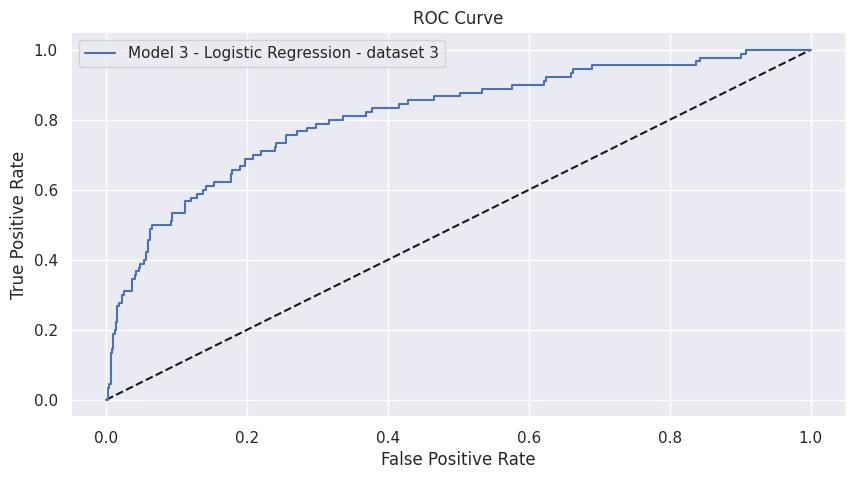

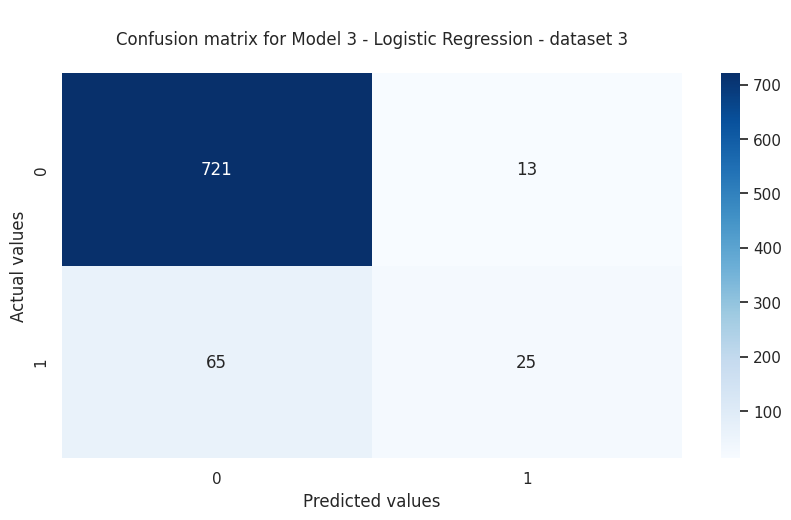

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898


In [230]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(lr_model_3, 'Model 3 - Logistic Regression - dataset 3')

In [231]:
# stop

### Istotność cech Logitic Regression zestaw 3

In [232]:
training_features_3 = list(model_columns_3)
training_features_3.remove('y_numeric')
training_features_3

['age',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'cons.conf.idx',
 'emp.var.rate']

In [233]:
calculate_and_print_feature_importance(lr_model_3, training_features_3)

Feature: housing, Importance: 0.12002572661034508
Feature: age, Importance: 0.11831882569404724
Feature: pdays, Importance: 0.08967731874721735
Feature: cons.conf.idx, Importance: 0.08292524344637958
Feature: previous, Importance: 0.07847320776529464
Feature: marital, Importance: 0.05395799465850032
Feature: job, Importance: 0.052244486117661255
Feature: education, Importance: 0.04478898312133395
Feature: loan, Importance: 0.044630111514455804
Feature: day_of_week, Importance: 0.04018842208204037
Feature: contact, Importance: 0.03907716889985139
Feature: campaign, Importance: 0.01923650750901122
Feature: poutcome, Importance: 0.018811897600163677
Feature: emp.var.rate, Importance: 0.00810532392323838


## Model 4 - Support Vector Machines() - zestaw 1

In [234]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,admin.,admin.,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [235]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model', svm.SVC(probability=True))
])



In [236]:
svm_param_grid = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors':
     [3, 5, 7],
    'svm_model__C':
     [0.001, 0.01, 0.1],
    'svm_model__kernel':
     ['linear', 'rbf', 'poly'],
    'svm_model__gamma':
     ['scale', 'auto',0.0001, 0.001, 0.01]
}

In [237]:
svm_search = HalvingGridSearchCV(svm_pipeline,
                                 svm_param_grid,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 675
n_resources: 40
Fitting 10 folds for each of 675 candidates, totalling 6750 fits
----------
iter: 1
n_candidates: 225
n_resources: 120
Fitting 10 folds for each of 225 candidates, totalling 2250 fits
----------
iter: 2
n_candidates: 75
n_resources: 360
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 3
n_candidates: 25
n_resources: 1080
Fitting 10 folds for each of 25 candidates, totalling 250 fits
----------
iter: 4
n_candidates: 9
n_resources: 3240
Fitting 10 folds for each of 9 candidates, totalling 90 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49c3da66b0>...
                                              ('smote', SMOTE(random_state=23)),
                                              ('svm_model',
                                               SVC(probability=True))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [3, 5, 7],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5, 0.8],
                                'svm_model__C': [0.001, 0.01, 0.1],
                                'svm_model__gamma': ['scale', 'auto', 0.0001,
                                                     0.001, 0.01],
                                'svm_model__kernel': ['linear', 'rbf', 'poly']},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [238]:
print('\nBest hyperparameter:', svm_search.best_params_)


Best hyperparameter: {'smote__k_neighbors': 3, 'smote__sampling_strategy': 'all', 'svm_model__C': 0.01, 'svm_model__gamma': 0.001, 'svm_model__kernel': 'rbf'}


In [239]:
svm_model = svm_search.best_estimator_

In [240]:
X_test_data = X_test
y_test_data = y_test

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       734
           1       0.53      0.33      0.41        90

    accuracy                           0.89       824
   macro avg       0.72      0.65      0.68       824
weighted avg       0.88      0.89      0.88       824



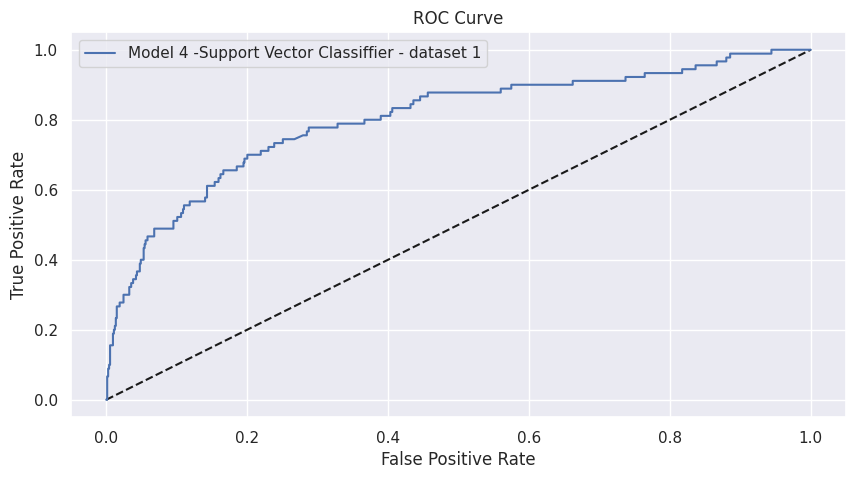

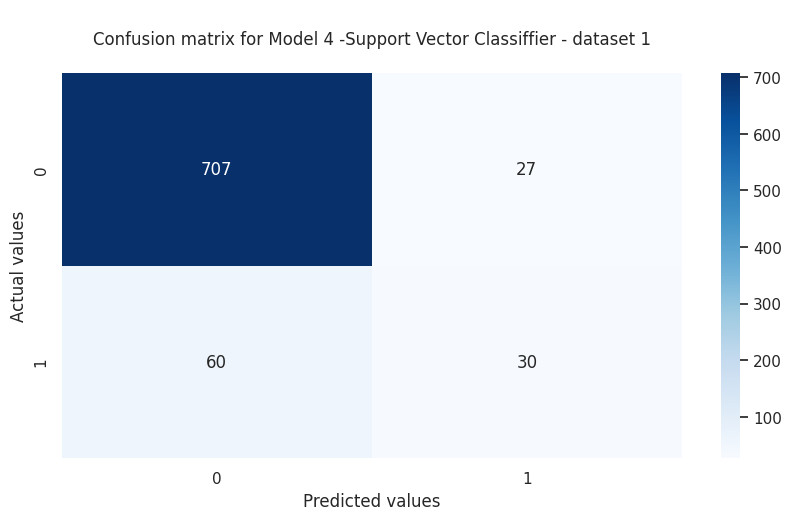

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551


In [241]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model, 'Model 4 -Support Vector Classiffier - dataset 1')

In [242]:
feature_importance = calculate_and_print_feature_importance_2(svm_model, X_test, y_test)
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0095 ± 0.0071  pdays
0.0039 ± 0.0018  age
0.0015 ± 0.0010  poutcome
0.0002 ± 0.0010  loan
0.0002 ± 0.0018  education
     0 ± 0.0000  marital
     0 ± 0.0000  housing
     0 ± 0.0000  day_of_week
-0.0000 ± 0.0015  month
-0.0000 ± 0.0015  contact
-0.0000 ± 0.0043  campaign
-0.0007 ± 0.0019  job
-0.0024 ± 0.0034  previous
-0.0034 ± 0.0028  cons.price.idx
-0.0039 ± 0.0039  cons.conf.idx
-0.0046 ± 0.0044  emp.var.rate
-0.0053 ± 0.0079  nr.employed
-0.0063 ± 0.0042  euribor3m
None


## Model 5 - Support Vector Machines() - zestaw 2

In [243]:
data_2.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,month_year
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,may_2009
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,may_2008
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,jun_2008
3,38,services,married,basic.9y,admin.,admin.,telephone,fri,3,999,0,nonexistent,jun_2008
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,nov_2008


In [244]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_2 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_2),
        ('ordinal_transformer', ordinal_transformer, ord_feat_2),
        ('numeric_transformer', numeric_transformer, num_feat_2)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_2', svm.SVC(probability=True))
])

In [245]:
svm_param_grid_2 = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors':
     [3, 5, 7],
    'svm_model_2__C':
     [0.0001, 0.001, 0.01],
    'svm_model_2__kernel':
     ['linear', 'rbf', 'poly'],
    'svm_model_2__gamma':
     ['scale', 'auto', 0.001, 0.01, 0.1]
}

In [246]:
svm_search_2 = HalvingGridSearchCV(svm_pipeline_2,
                                 svm_param_grid_2,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_2.fit(X_train_2, y_train_2)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 675
n_resources: 40
Fitting 10 folds for each of 675 candidates, totalling 6750 fits
----------
iter: 1
n_candidates: 225
n_resources: 120
Fitting 10 folds for each of 225 candidates, totalling 2250 fits
----------
iter: 2
n_candidates: 75
n_resources: 360
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 3
n_candidates: 25
n_resources: 1080
Fitting 10 folds for each of 25 candidates, totalling 250 fits
----------
iter: 4
n_candidates: 9
n_resources: 3240
Fitting 10 folds for each of 9 candidates, totalling 90 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49cf9f0b80>...
                                              ('smote', SMOTE(random_state=23)),
                                              ('svm_model_2',
                                               SVC(probability=True))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [3, 5, 7],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5, 0.8],
                                'svm_model_2__C': [0.0001, 0.001, 0.01],
                                'svm_model_2__gamma': ['scale', 'auto', 0.001,
                                                       0.01, 0.1],
                                'svm_model_2__kernel': ['linear', 'rbf',
                                                        'poly']},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [247]:
print('\nBest hyperparameter:', svm_search_2.best_params_)


Best hyperparameter: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 0.3, 'svm_model_2__C': 0.0001, 'svm_model_2__gamma': 0.001, 'svm_model_2__kernel': 'linear'}


In [248]:
svm_model_2 = svm_search_2.best_estimator_

In [249]:
X_test_data = X_test_2
y_test_data = y_test_2

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       734
           1       0.00      0.00      0.00        90

    accuracy                           0.89       824
   macro avg       0.45      0.50      0.47       824
weighted avg       0.79      0.89      0.84       824



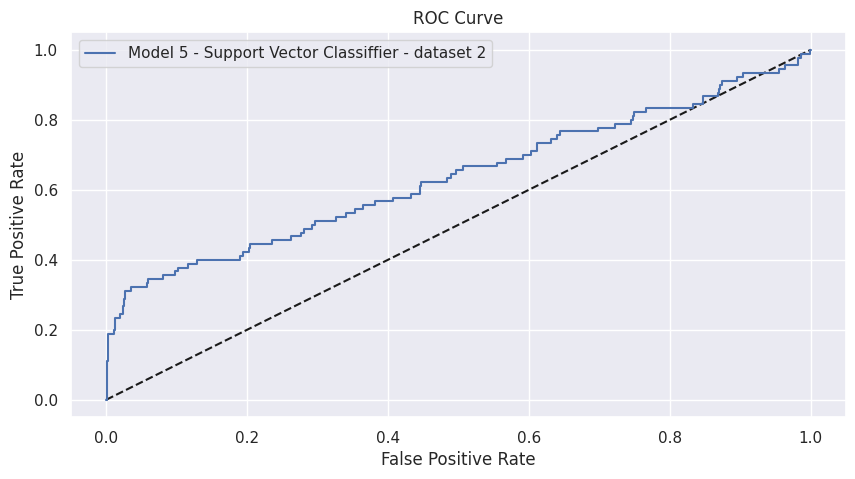

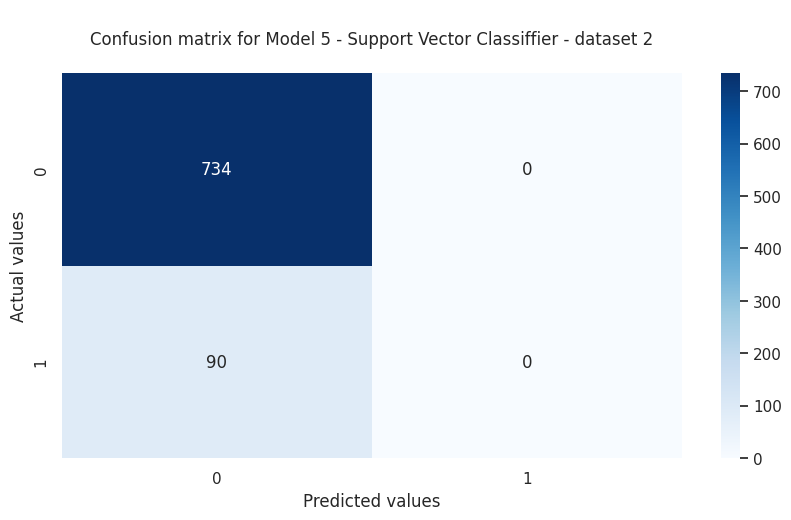

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
5,Model 5 - Support Vector Classiffier - dataset 2,0.000000,0.635135


In [250]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_2, 'Model 5 - Support Vector Classiffier - dataset 2')

In [251]:
feature_importance = calculate_and_print_feature_importance_2(svm_model_2, X_test_2, y_test_2)
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

     0 ± 0.0000  month_year
     0 ± 0.0000  poutcome
     0 ± 0.0000  previous
     0 ± 0.0000  pdays
     0 ± 0.0000  campaign
     0 ± 0.0000  day_of_week
     0 ± 0.0000  contact
     0 ± 0.0000  loan
     0 ± 0.0000  housing
     0 ± 0.0000  education
     0 ± 0.0000  marital
     0 ± 0.0000  job
     0 ± 0.0000  age
None


## Model 6 - Support Vector Machines() - zestaw 3

In [252]:
data_3.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,emp.var.rate
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,-46.2,-1.8
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,-36.4,1.1
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,-41.8,1.4
3,38,services,married,basic.9y,admin.,admin.,telephone,fri,3,999,0,nonexistent,-41.8,1.4
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,-42.0,-0.1


In [253]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_3 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_3),
        ('ordinal_transformer', ordinal_transformer, ord_feat_3),
        ('numeric_transformer', numeric_transformer, num_feat_3)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_3', svm.SVC(probability=True))
])

In [254]:
svm_param_grid_3 = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors':
     [3, 5, 7],
    'svm_model_3__C':
     [0.01, 0.1, 1],
    'svm_model_3__kernel':
     ['linear', 'rbf', 'poly'],
    'svm_model_3__gamma':
     ['scale', 'auto', 0.001, 0.01, 0.1]
}

In [255]:
svm_search_3 = HalvingGridSearchCV(svm_pipeline_3,
                                 svm_param_grid_3,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_3.fit(X_train_3, y_train_3)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 675
n_resources: 40
Fitting 10 folds for each of 675 candidates, totalling 6750 fits
----------
iter: 1
n_candidates: 225
n_resources: 120
Fitting 10 folds for each of 225 candidates, totalling 2250 fits
----------
iter: 2
n_candidates: 75
n_resources: 360
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 3
n_candidates: 25
n_resources: 1080
Fitting 10 folds for each of 25 candidates, totalling 250 fits
----------
iter: 4
n_candidates: 9
n_resources: 3240
Fitting 10 folds for each of 9 candidates, totalling 90 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49cfc88b80>...
                                              ('smote', SMOTE(random_state=23)),
                                              ('svm_model_3',
                                               SVC(probability=True))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [3, 5, 7],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5, 0.8],
                                'svm_model_3__C': [0.01, 0.1, 1],
                                'svm_model_3__gamma': ['scale', 'auto', 0.001,
                                                       0.01, 0.1],
                                'svm_model_3__kernel': ['linear', 'rbf',
                                                        'poly']},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [256]:
print('\nBest hyperparameter:', svm_search_3.best_params_)


Best hyperparameter: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 'all', 'svm_model_3__C': 0.1, 'svm_model_3__gamma': 0.01, 'svm_model_3__kernel': 'poly'}


In [257]:
svm_model_3 = svm_search_3.best_estimator_

In [258]:
X_test_data = X_test_3
y_test_data = y_test_3

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       734
           1       0.67      0.22      0.33        90

    accuracy                           0.90       824
   macro avg       0.79      0.60      0.64       824
weighted avg       0.89      0.90      0.88       824



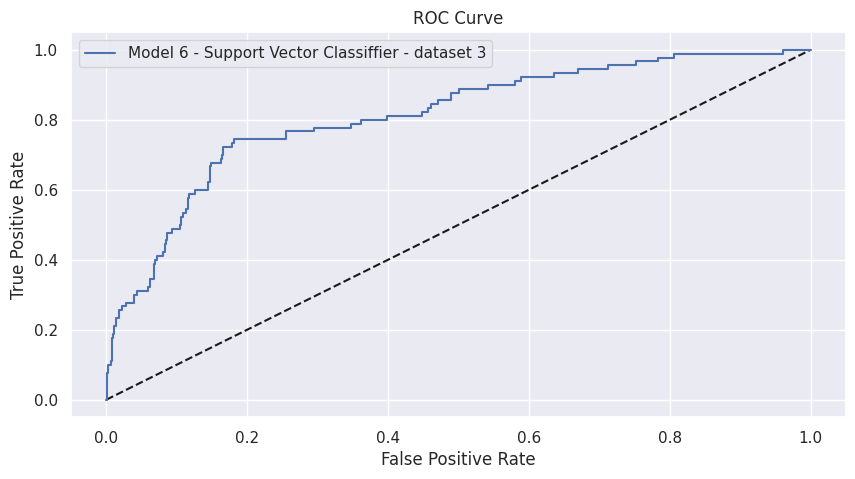

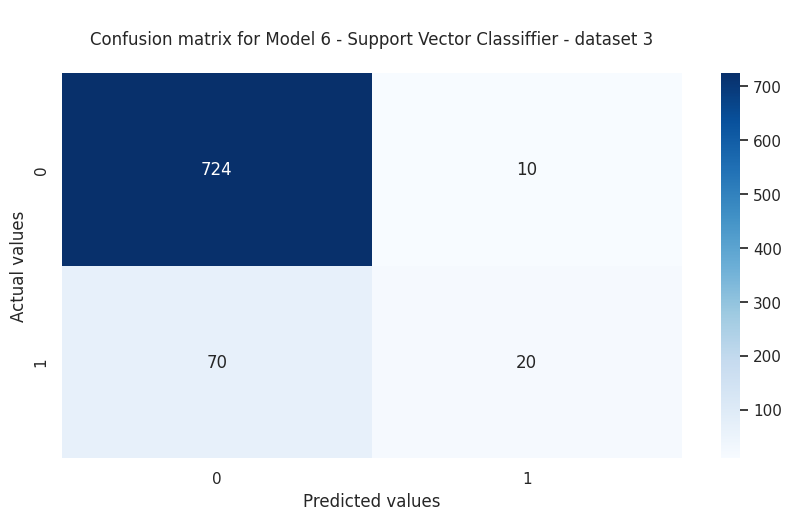

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
5,Model 5 - Support Vector Classiffier - dataset 2,0.000000,0.635135
6,Model 6 - Support Vector Classiffier - dataset 3,0.333333,0.811505


In [259]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_3, 'Model 6 - Support Vector Classiffier - dataset 3')

In [260]:
feature_importance = calculate_and_print_feature_importance_2(svm_model_3, X_test_3, y_test_3)
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0204 ± 0.0080  pdays
0.0032 ± 0.0019  previous
0.0002 ± 0.0010  emp.var.rate
     0 ± 0.0000  poutcome
     0 ± 0.0000  campaign
     0 ± 0.0000  contact
     0 ± 0.0000  loan
     0 ± 0.0000  housing
     0 ± 0.0000  marital
-0.0002 ± 0.0010  job
-0.0002 ± 0.0010  age
-0.0005 ± 0.0012  education
-0.0010 ± 0.0010  day_of_week
-0.0012 ± 0.0000  cons.conf.idx
None


## Model 7 - Support Vector Classifier - zestaw 4

In [261]:
data_4.head()

,age,job,marital,education,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,emp.var.rate,month_year
0,30,blue-collar,married,basic.9y,yes,no,cellular,fri,2,999,0,nonexistent,92.893,-1.8,may_2009
1,39,services,single,high.school,no,no,telephone,fri,4,999,0,nonexistent,93.994,1.1,may_2008
2,25,services,married,high.school,yes,no,telephone,wed,1,999,0,nonexistent,94.465,1.4,jun_2008
3,38,services,married,basic.9y,admin.,admin.,telephone,fri,3,999,0,nonexistent,94.465,1.4,jun_2008
4,47,admin.,married,university.degree,yes,no,cellular,mon,1,999,0,nonexistent,93.200,-0.1,nov_2008


In [262]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

svm_pipeline_4 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_4),
        ('ordinal_transformer', ordinal_transformer, ord_feat_4),
        ('numeric_transformer', numeric_transformer, num_feat_4)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('svm_model_4', svm.SVC(probability=True))
])


In [263]:
svm_param_grid_4 = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5],
    'smote__k_neighbors':
     [3, 5, 7],
    'svm_model_4__C':
     [0.01, 0.1, 1],
    'svm_model_4__kernel':
     ['linear', 'rbf', 'poly'],
    'svm_model_4__gamma':
     ['scale', 'auto', 0.001, 0.01]
}

In [264]:
svm_search_4 = HalvingGridSearchCV(svm_pipeline_4,
                                 svm_param_grid_4,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

svm_search_4.fit(X_train_4, y_train_4)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 432
n_resources: 40
Fitting 10 folds for each of 432 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 144
n_resources: 120
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 48
n_resources: 360
Fitting 10 folds for each of 48 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 16
n_resources: 1080
Fitting 10 folds for each of 16 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 6
n_resources: 3240
Fitting 10 folds for each of 6 candidates, totalling 60 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49cfd505b0>...
                                              ('smote', SMOTE(random_state=23)),
                                              ('svm_model_4',
                                               SVC(probability=True))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [3, 5, 7],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5],
                                'svm_model_4__C': [0.01, 0.1, 1],
                                'svm_model_4__gamma': ['scale', 'auto', 0.001,
                                                       0.01],
                                'svm_model_4__kernel': ['linear', 'rbf',
                                                        'poly']},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [265]:
print('\nBest hyperparameter:', svm_search_4.best_params_)


Best hyperparameter: {'smote__k_neighbors': 3, 'smote__sampling_strategy': 'minority', 'svm_model_4__C': 1, 'svm_model_4__gamma': 'auto', 'svm_model_4__kernel': 'linear'}


In [266]:
svm_model_4 = svm_search_4.best_estimator_

In [267]:
X_test_data = X_test_4
y_test_data = y_test_4

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       734
           1       0.28      0.72      0.40        90

    accuracy                           0.76       824
   macro avg       0.62      0.74      0.63       824
weighted avg       0.88      0.76      0.80       824



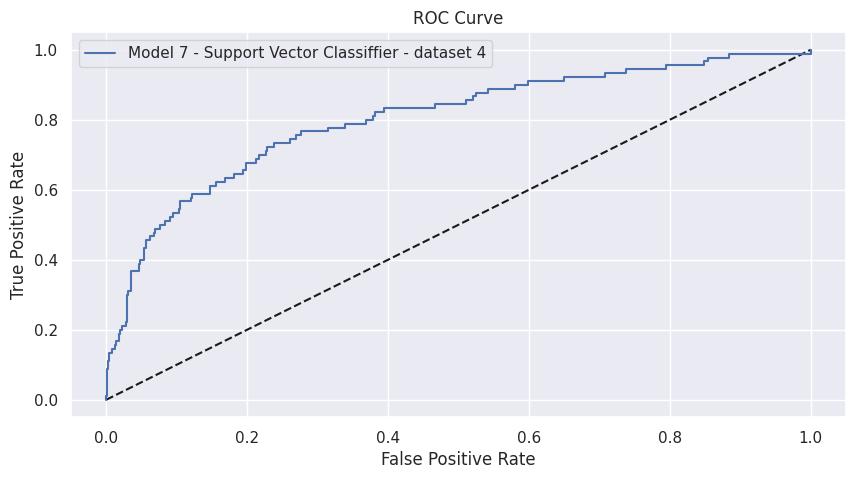

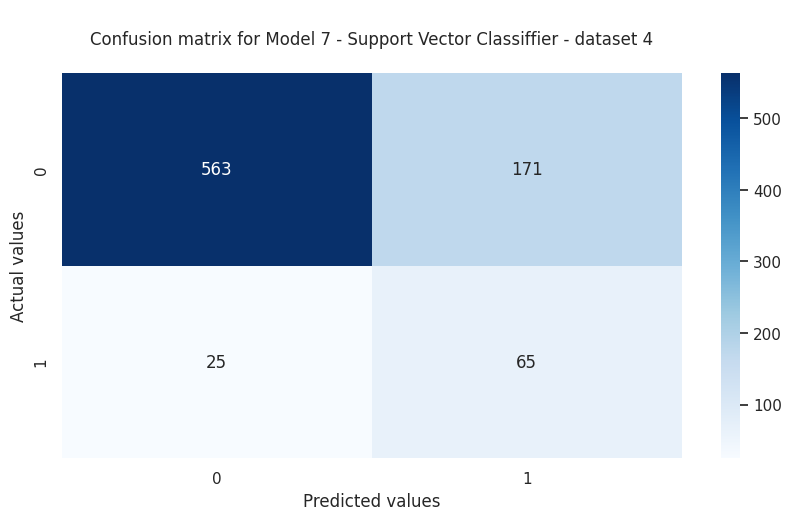

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
5,Model 5 - Support Vector Classiffier - dataset 2,0.000000,0.635135
6,Model 6 - Support Vector Classiffier - dataset 3,0.333333,0.811505
7,Model 7 - Support Vector Classiffier - dataset 4,0.398773,0.802134


In [268]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(svm_model_4, 'Model 7 - Support Vector Classiffier - dataset 4')

In [269]:
feature_importance = calculate_and_print_feature_importance_2(svm_model_4, X_test_4, y_test_4)
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.1328 ± 0.0278  emp.var.rate
0.0313 ± 0.0103  cons.price.idx
0.0109 ± 0.0067  pdays
0.0073 ± 0.0067  poutcome
0.0051 ± 0.0024  previous
0.0049 ± 0.0051  job
0.0046 ± 0.0032  loan
0.0044 ± 0.0123  month_year
0.0034 ± 0.0032  marital
0.0029 ± 0.0033  education
0.0027 ± 0.0039  housing
0.0022 ± 0.0036  day_of_week
0.0012 ± 0.0031  age
-0.0015 ± 0.0068  campaign
-0.0092 ± 0.0045  contact
None


## Model 8 - XGBoost() - zestaw 1

In [270]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,admin.,admin.,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [271]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat),
        ('ordinal_transformer', ordinal_transformer, ord_feat),
        ('numeric_transformer', numeric_transformer, num_feat)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model', XGBClassifier(verbosity=0))
])

In [272]:
xgb_param_grid = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5],
    'smote__k_neighbors':
     [3, 5, 7],
    'xgb_model__n_estimators': [50, 100, 150],
    'xgb_model__max_depth': [2, 18, 25],
    'xgb_model__learning_rate': [0.2, 0.1, 0.01],
    'xgb_model__gamma': [0.00001, 0.0001, 0.001]
}

In [273]:
xgb_search = HalvingGridSearchCV(xgb_pipeline,
                                 xgb_param_grid,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 40
Fitting 10 folds for each of 972 candidates, totalling 9720 fits
----------
iter: 1
n_candidates: 324
n_resources: 120
Fitting 10 folds for each of 324 candidates, totalling 3240 fits
----------
iter: 2
n_candidates: 108
n_resources: 360
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
----------
iter: 3
n_candidates: 36
n_resources: 1080
Fitting 10 folds for each of 36 candidates, totalling 360 fits
----------
iter: 4
n_candidates: 12
n_resources: 3240
Fitting 10 folds for each of 12 candidates, totalling 120 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49cfa34730>...
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [3, 5, 7],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5],
                                'xgb_model__gamma': [1e-05, 0.0001, 0.001],
                                'xgb_model__learning_rate': [0.2, 0.1, 0.01],
                                'xgb_model__max_depth': [2, 18, 25],
                                'xgb_model__n_estimators': [50, 100, 150]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [274]:
print('\nBest hyperparameters:', xgb_search.best_params_)
xgb_model = xgb_search.best_estimator_


Best hyperparameters: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 'all', 'xgb_model__gamma': 1e-05, 'xgb_model__learning_rate': 0.1, 'xgb_model__max_depth': 2, 'xgb_model__n_estimators': 50}


In [275]:
X_test_data = X_test
y_test_data = y_test

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       734
           1       0.50      0.50      0.50        90

    accuracy                           0.89       824
   macro avg       0.72      0.72      0.72       824
weighted avg       0.89      0.89      0.89       824



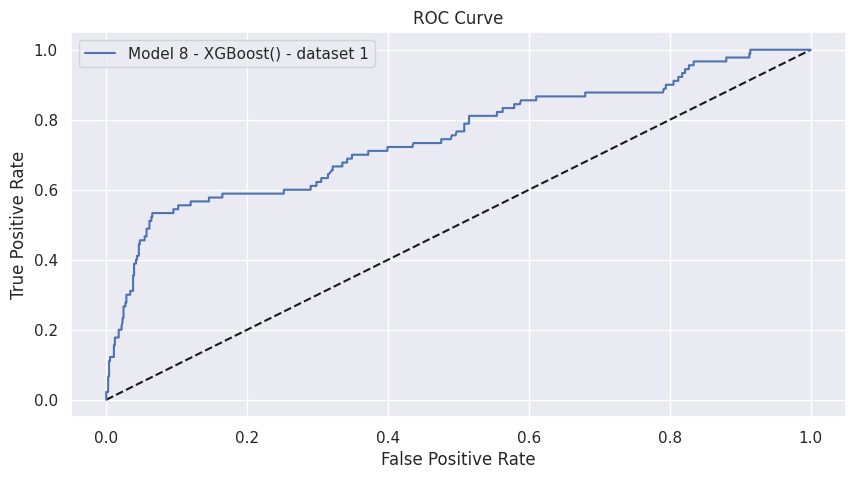

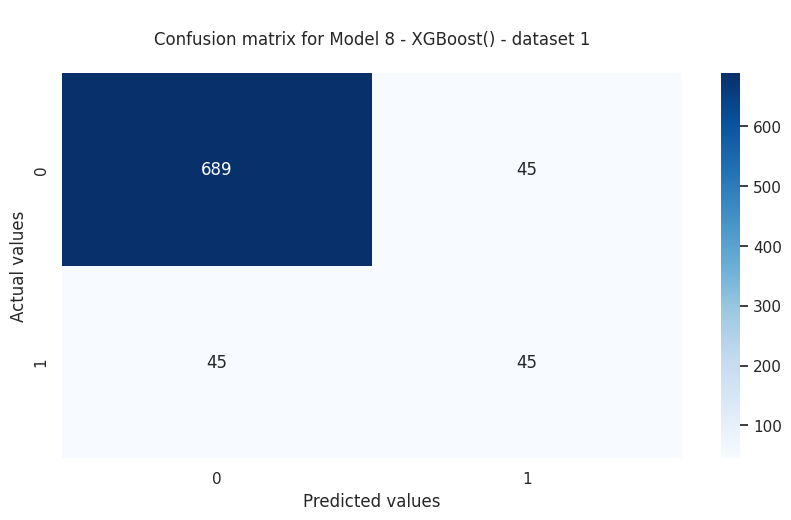

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
5,Model 5 - Support Vector Classiffier - dataset 2,0.000000,0.635135
6,Model 6 - Support Vector Classiffier - dataset 3,0.333333,0.811505
7,Model 7 - Support Vector Classiffier - dataset 4,0.398773,0.802134
8,Model 8 - XGBoost() - dataset 1,0.500000,0.748872


In [276]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model, 'Model 8 - XGBoost() - dataset 1')

In [277]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model, X_test , y_test )
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0478 ± 0.0048  nr.employed
0.0087 ± 0.0101  contact
0.0012 ± 0.0000  pdays
0.0007 ± 0.0019  month
0.0002 ± 0.0028  emp.var.rate
0.0000 ± 0.0022  euribor3m
     0 ± 0.0000  housing
     0 ± 0.0000  day_of_week
     0 ± 0.0000  previous
     0 ± 0.0000  poutcome
     0 ± 0.0000  cons.price.idx
     0 ± 0.0000  cons.conf.idx
     0 ± 0.0000  age
-0.0005 ± 0.0019  job
-0.0005 ± 0.0059  campaign
-0.0019 ± 0.0045  education
-0.0022 ± 0.0028  loan
-0.0022 ± 0.0028  marital
None


## Model 9 - XGBoost() - zestaw 2

In [278]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_2 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_2),
        ('ordinal_transformer', ordinal_transformer, ord_feat_2),
        ('numeric_transformer', numeric_transformer, num_feat_2)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_2', XGBClassifier(verbosity=0))
])


In [ ]:
xgb_param_grid_2 = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors':
     [3, 5, 7],
    'xgb_model_2__n_estimators': [50, 100, 150],
    'xgb_model_2__max_depth': [3, 6, 12],
    'xgb_model_2__learning_rate': [0.1, 0.01, 0.001],
    'xgb_model_2__gamma': [0.0001, 0.001, 0.01]
}

In [ ]:
xgb_search_2 = HalvingGridSearchCV(xgb_pipeline_2,
                                 xgb_param_grid_2,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_2.fit(X_train_2, y_train_2)

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1215
n_resources: 40
Fitting 10 folds for each of 1215 candidates, totalling 12150 fits
----------
iter: 1
n_candidates: 405
n_resources: 120
Fitting 10 folds for each of 405 candidates, totalling 4050 fits
----------
iter: 2
n_candidates: 135
n_resources: 360
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
----------
iter: 3
n_candidates: 45
n_resources: 1080
Fitting 10 folds for each of 45 candidates, totalling 450 fits
----------
iter: 4
n_candidates: 15
n_resources: 3240
Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [ ]:
print('\nBest hyperparameters:', xgb_search_2.best_params_)

In [ ]:
xgb_model_2 = xgb_search_2.best_estimator_

In [ ]:
X_test_data = X_test_2
y_test_data = y_test_2

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_2, 'Model 9 - XGBoost() - dataset 2')

In [ ]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model_2, X_test_2 , y_test_2 )
print(feature_importance)

## Model 10 - XGBoost() - zestaw 3

In [ ]:
data_3.head()

In [ ]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_3 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_3),
        ('ordinal_transformer', ordinal_transformer, ord_feat_3),
        ('numeric_transformer', numeric_transformer, num_feat_3)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_3', XGBClassifier(verbosity=0))
])

In [ ]:
xgb_param_grid_3 = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors':
     [3, 5, 7],
    'xgb_model_3__n_estimators': [100, 150, 200],
    'xgb_model_3__max_depth': [6, 12, 20],
    'xgb_model_3__learning_rate': [0.01, 0.001, 0.0001],
    'xgb_model_3__gamma': [0.001, 0.01, 0.1]
}

In [289]:
xgb_search_3 = HalvingGridSearchCV(xgb_pipeline_3,
                                 xgb_param_grid_3,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_3.fit(X_train_3, y_train_3)

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1215
n_resources: 40
Fitting 10 folds for each of 1215 candidates, totalling 12150 fits
----------
iter: 1
n_candidates: 405
n_resources: 120
Fitting 10 folds for each of 405 candidates, totalling 4050 fits
----------
iter: 2
n_candidates: 135
n_resources: 360
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
----------
iter: 3
n_candidates: 45
n_resources: 1080
Fitting 10 folds for each of 45 candidates, totalling 450 fits
----------
iter: 4
n_candidates: 15
n_resources: 3240
Fitting 10 folds for each of 15 candidates, totalling 150 fits


HalvingGridSearchCV(cv=10,
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('categorical_transformer',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder())]),
                                                                                ['job',
                                                                                 'marital',
                                                                                 'education',
                                                                                 'housing',
                                                                                 'loan',
                                                                                 'contact',
                                                                                 'poutcome']),
                                                                               ('ordinal_transformer',
                                                                                Pipeline(steps=[('label_encoder',
                                                                                                 <__main__.LabelEncoderTransformer object at 0x7c49cfb87ee0>...
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]),
                    n_jobs=-1,
                    param_grid={'smote__k_neighbors': [3, 5, 7],
                                'smote__sampling_strategy': ['minority', 'all',
                                                             0.3, 0.5, 0.8],
                                'xgb_model_3__gamma': [0.001, 0.01, 0.1],
                                'xgb_model_3__learning_rate': [0.01, 0.001,
                                                               0.0001],
                                'xgb_model_3__max_depth': [6, 12, 20],
                                'xgb_model_3__n_estimators': [100, 150, 200]},
                    random_state=23, scoring='f1_weighted', verbose=1)

In [290]:
print('\nBest hyperparameters:', xgb_search_3.best_params_)
xgb_model_3 = xgb_search_3.best_estimator_


Best hyperparameters: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 'minority', 'xgb_model_3__gamma': 0.1, 'xgb_model_3__learning_rate': 0.01, 'xgb_model_3__max_depth': 20, 'xgb_model_3__n_estimators': 100}


In [291]:
X_test_data = X_test_3
y_test_data = y_test_3

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       734
           1       0.49      0.43      0.46        90

    accuracy                           0.89       824
   macro avg       0.71      0.69      0.70       824
weighted avg       0.88      0.89      0.89       824



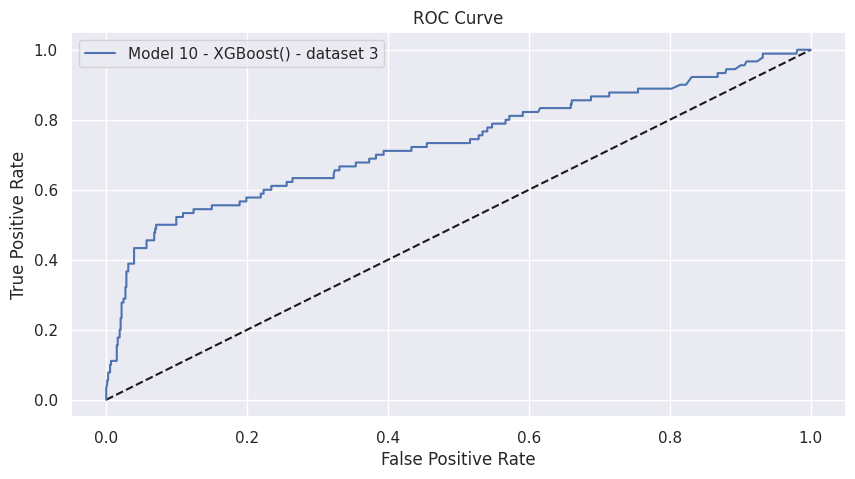

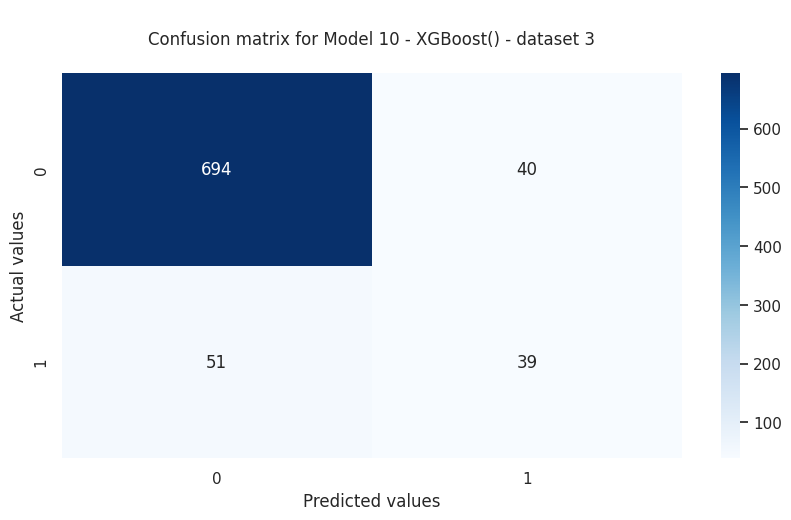

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
5,Model 5 - Support Vector Classiffier - dataset 2,0.000000,0.635135
6,Model 6 - Support Vector Classiffier - dataset 3,0.333333,0.811505
7,Model 7 - Support Vector Classiffier - dataset 4,0.398773,0.802134
8,Model 8 - XGBoost() - dataset 1,0.500000,0.748872
9,Model 9 - XGBoost() - dataset 2,0.085106,0.741409


In [292]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_3, 'Model 10 - XGBoost() - dataset 3')

In [293]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model_3, X_test_3 , y_test_3)
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.1214 ± 0.0092  emp.var.rate
0.1109 ± 0.0124  cons.conf.idx
0.0070 ± 0.0042  contact
0.0044 ± 0.0029  marital
0.0024 ± 0.0081  campaign
0.0017 ± 0.0050  age
0.0015 ± 0.0018  pdays
0.0012 ± 0.0022  poutcome
0.0002 ± 0.0028  loan
     0 ± 0.0000  previous
-0.0000 ± 0.0041  day_of_week
-0.0010 ± 0.0068  education
-0.0015 ± 0.0058  job
-0.0049 ± 0.0031  housing
None


## Model 11 - XGBoost() - zestaw  4

In [294]:
categorical_transformer = Pipeline_imb(steps=[
    ('ohe', preprocessing.OneHotEncoder())
])

ordinal_transformer = Pipeline_imb(steps=[
    ('label_encoder', LabelEncoderTransformer())
])

numeric_transformer = Pipeline_imb(steps=[
    ('scaler', StandardScaler())
])

xgb_pipeline_4 = Pipeline_imb([
    ('preprocessor', ColumnTransformer(transformers=[
        ('categorical_transformer', categorical_transformer, cat_feat_4),
        ('ordinal_transformer', ordinal_transformer, ord_feat_4),
        ('numeric_transformer', numeric_transformer, num_feat_4)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('xgb_model_4', XGBClassifier(verbosity=0))
])

In [295]:
xgb_param_grid_4 = {
    'smote__sampling_strategy':
     ['minority', 'all', 0.3, 0.5, 0.8],
    'smote__k_neighbors':
     [3, 5, 7],
    'xgb_model_4__n_estimators': [50, 100, 150],
    'xgb_model_4__max_depth': [6, 12, 20],
    'xgb_model_4__learning_rate': [0.1, 0.01, 0.001],
    'xgb_model_4__gamma': [0.001, 0.01, 0.1]
}

In [ ]:
xgb_search_4 = HalvingGridSearchCV(xgb_pipeline_4,
                                 xgb_param_grid_4,
                                 scoring='f1_weighted',
                                 cv=10,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=seed)

xgb_search_4.fit(X_train_4, y_train_4)

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 40
max_resources_: 3295
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1215
n_resources: 40
Fitting 10 folds for each of 1215 candidates, totalling 12150 fits
----------
iter: 1
n_candidates: 405
n_resources: 120
Fitting 10 folds for each of 405 candidates, totalling 4050 fits
----------
iter: 2
n_candidates: 135
n_resources: 360
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
----------
iter: 3
n_candidates: 45
n_resources: 1080
Fitting 10 folds for each of 45 candidates, totalling 450 fits
----------
iter: 4
n_candidates: 15
n_resources: 3240
Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [ ]:
print('\nBest hyperparameters:', xgb_search_4.best_params_)
xgb_model_4 = xgb_search_4.best_estimator_

In [ ]:
X_test_data = X_test_4
y_test_data = y_test_4

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       734
           1       0.51      0.30      0.38        90

    accuracy                           0.89       824
   macro avg       0.71      0.63      0.66       824
weighted avg       0.87      0.89      0.88       824



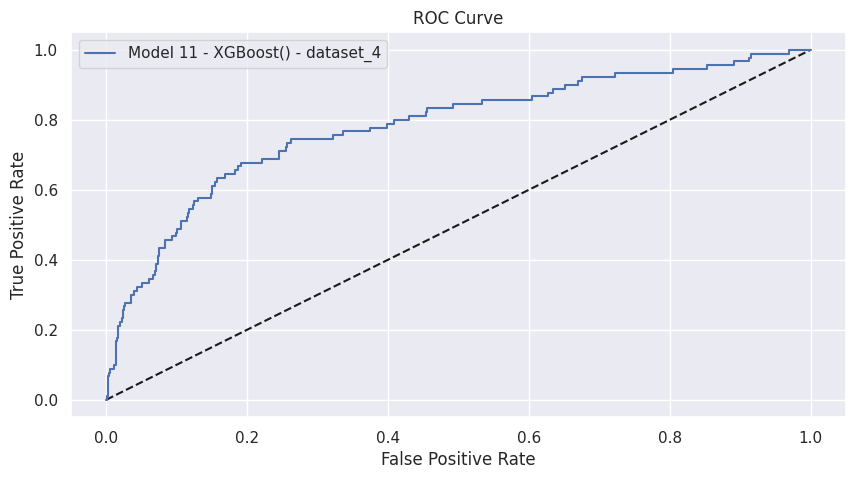

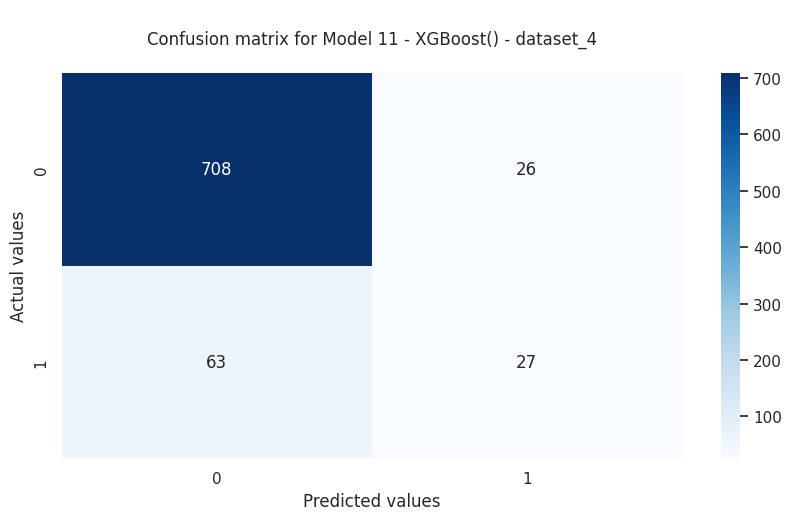

,Model,F1_score,AUC
0,Model 0 - Baseline RFC,0.307692,0.691243
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379
2,Model 2 - Logistic Regression - dataset 2,0.347107,0.722404
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
5,Model 5 - Support Vector Classiffier - dataset 2,0.000000,0.635135
6,Model 6 - Support Vector Classiffier - dataset 3,0.333333,0.811505
7,Model 7 - Support Vector Classiffier - dataset 4,0.398773,0.802134
8,Model 8 - XGBoost() - dataset 1,0.500000,0.748872
9,Model 9 - XGBoost() - dataset 2,0.085106,0.741409


In [305]:
sns.set(rc={"figure.figsize":(10, 5)})
calculation_metrics(xgb_model_4, 'Model 11 - XGBoost() - dataset_4')

In [303]:
feature_importance = calculate_and_print_feature_importance_2(xgb_model_4, X_test_4 , y_test_4)
print(feature_importance)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0476 ± 0.0181  emp.var.rate
0.0272 ± 0.0075  cons.price.idx
0.0056 ± 0.0050  marital
0.0032 ± 0.0036  poutcome
0.0027 ± 0.0042  pdays
0.0024 ± 0.0063  contact
0.0017 ± 0.0094  month_year
0.0005 ± 0.0088  age
0.0002 ± 0.0010  previous
-0.0002 ± 0.0066  campaign
-0.0007 ± 0.0064  education
-0.0012 ± 0.0034  loan
-0.0015 ± 0.0086  job
-0.0022 ± 0.0032  day_of_week
-0.0036 ± 0.0067  housing
None


# Wyniki zbiorcze

In [304]:
top_5_auc_models = metrics_dataframe.sort_values(by=['AUC', 'F1_score'], ascending=False).head(5)
top_5_auc_models

,Model,F1_score,AUC
3,Model 3 - Logistic Regression - dataset 3,0.390625,0.811898
6,Model 6 - Support Vector Classiffier - dataset 3,0.333333,0.811505
4,Model 4 -Support Vector Classiffier - dataset 1,0.408163,0.802551
7,Model 7 - Support Vector Classiffier - dataset 4,0.398773,0.802134
1,Model 1 - Logistic Regression - dataset 1,0.491979,0.799379


In [ ]:
stop

In [306]:
models = [lr_model_3, svm_model_3, svm_model, svm_model_4, lr_model]
model_names = top_5_auc_models['Model']

X_test_data_end = [X_test_3, X_test_3, X_test, X_test_4, X_test]
y_test_data_end = [y_test_3, y_test_3, y_test, y_test_4, y_test]

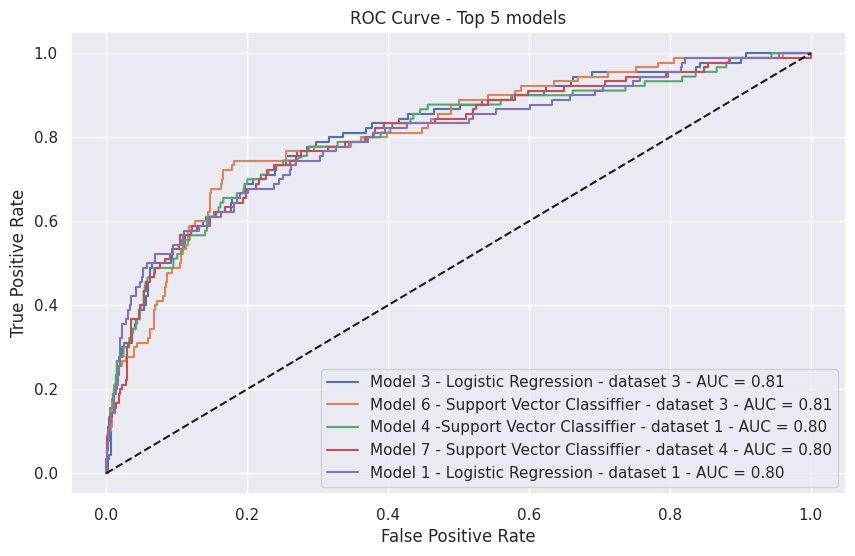

In [307]:
plt.figure(figsize=(10, 6))

for model, model_name, X_testing, y_testing in zip(models, model_names, X_test_data_end, y_test_data_end):
    try:
        predictions_proba = model.predict_proba(X_testing)
        fpr, tpr, _ = roc_curve(y_testing, predictions_proba[:, 1])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc_score:.2f}')
    except Exception as e:
        print(f"An error occurred for model {model_name}: {str(e)}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Top 5 models')
plt.legend()
plt.show()
